# Part I - Marketing Analytics
## by Keenan Cooper

# Table of Contents

1. [Introduction](#introduction)\
    1.1 [Description](#description)\
    1.2 [Data Dictionary](#dictionary)
2. [Data Gathering](#gathering)
3. [Assessing Data](#assessing)\
    3.1 [Exploration](#exploration)\
    3.2 [Observations](#observations)
4. [Cleaning Data](#cleaning)
5. [Overview](#overview)
6. [Analyzing and Visualizing Data](#analyzing)\
    6.1 [Univariate Exploration](#univariate)\
    6.2 [Bivariate Exploration](#bivariate)\
    6.3 [Multivariate Exploration](#multivariate)
7. [Conclusion](#conclusion)

## 1. Introduction<a id="introduction"></a>

<a id="description"></a>
### 1.1 Description

#### Content
The dataset `marketing_data.csv` was downloaded from a [kaggle dataset](https://www.kaggle.com/jackdaoud/marketing-data) and consists of 2,240 customers of a online food ordering and food delivery platform. The dataset contains data on:
- Customer profiles
- Product preferences
- Campaign successes/failures
- Channel performance

#### Acknowledgement

Credit to Dr. Omar Romero-Hernandez for providing this data set for his students. And credit to Jack Daoud for uploading and maintaining this data on Kaggle.

<a id="dictionary"></a>
### 1.2 Data Dictionary
Note: Names of features reflect changes made after data cleaning phase.

| FEATURE      | DESCRIPTION |
| :------------- | :----------- |
|ID|Customer ID|
|Registry_Date|Date of the customer's registry with the company|
|Birth_Year| Birth year of thecustomer|
|Education|Customer's level of education|
|Marital_Status|Customer's martial status|
|Country|Customer's country of residency|
|Income|Customer's yearly household income in USD|
|Kidhome|Number of children under 12 years old in customer's household|
|Teenhome|Number of teenagers in customer's household|
|Last_Purchase|Number of days since last purchase|
|MntWines|Amount spent on wines in the last 2 years in USD|
|MntFruits|Amount spent on fruits in the last 2 years in USD|
|MntMeatProducts|Amount spent on meat in the last 2 years in USD|
|MntFishProducts|Amount spent on fish in the last 2 years in USD|
|MntSweetProducts|Amount spent on sweets in the last 2 years in USD|
|MntGoldProds|Amount spent on gold in the last 2 years in USD|
|NumDealsPurchases|Number of purchases made with a discount|
|NumWebPurchases|Number of purchases made online|
|NumCatalogPurchases|Number of purchases made using a catalog|
|NumStorePurchases|Number of purchases made in store|
|AcceptedCmp1|1 if customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2|1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3|1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4|1 if customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5|1 if customer accepted the offer in the 5th campaign, 0 otherwise|
|Response|1 if customer accepted the offer in the last campaign, 0 otherwise|
|Complaint|1 if customer issued a complaint in the last 2 years, 0 otherwise|

## 2. Data Gathering<a id="gathering"></a>

In [314]:
# Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
# Visualization defaults
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
default_color = sns.color_palette()[0]
%matplotlib inline

In [316]:
plt.rcParams["figure.figsize"] = [10, 6]

In [317]:
plt.rcParams["figure.figsize"]

[10.0, 6.0]

In [318]:
pd.set_option('max_columns', None)

marketing = pd.read_csv("marketing_data.csv")
marketing.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


<a id="assessing"></a>
## 3. Assessing Data

<a id="exploration"></a>
### 3.1 Exploration

In [319]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [320]:
marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [321]:
list(marketing)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 ' Income ',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

In [322]:
marketing[marketing.isna().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,AUS


In [323]:
marketing.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [324]:
marketing.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [325]:
marketing.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [326]:
marketing[marketing.Year_Birth < 1930]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
513,11004,1893,2n Cycle,Single,"$60,182.00",0,1,5/17/14,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0,SA
827,1150,1899,PhD,Together,"$83,532.00",0,0,9/26/13,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,"$36,640.00",1,0,9/26/13,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1,IND


In [327]:
marketing.Dt_Customer

0        6/16/14
1        6/15/14
2        5/13/14
3        5/11/14
4         4/8/14
          ...   
2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, Length: 2240, dtype: object

In [328]:
marketing.Country.value_counts()

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [329]:
marketing[' Income ']

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name:  Income , Length: 2240, dtype: object

<a id="observations"></a>
### 3.3 Observations

| #      | Issue |
| :------------- | :----------- |
| 1 |Dataframe columns are sorted unintuitively|
| 2 |` Income ` column has unnecessary leading and trailing spaces and `Year_Birth`, `Complain`, `Recency`, and `Dt_Customer` are unnatural
| 3 |` Income` is not formatted correctly (contains dollar signs and commas|
| 4 |`Education` values are ambiguous |
| 5 |`Marital_Status` values are ambiguous|
| 6 |`Country` values are ambiguous|
| 7 |` Income ` contains null values (2016 verses 2040 of the other columns|
| 8 |` Income `, `dt.customer`, `Education`, `Marital_Status`, and `Country` have incorrect dtypes|
| 9 |`Year_Birth` has a low values under 1930 that are likely misentries|

<a id="cleaning"></a>
## 4. Cleaning Data

In [330]:
# Make copies of original data
marketing_clean = marketing.copy()

### Issue #1:
- Dataframe columns are sorted unintuitively

#### Issue #1 - Define:
- Reassign order of headers manually

#### Issue #1 - Code

In [331]:
new_col_order = [
    'ID',
    'Dt_Customer',
    'Year_Birth',
    'Education',
    'Marital_Status',
    'Country',
    ' Income ',
    'Recency',
    'Kidhome',
    'Teenhome',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Response',
    'Complain'
]
marketing_clean = marketing_clean[new_col_order]

#### Issue #1 - Test

In [332]:
marketing_clean.head(3)

,ID,Dt_Customer,Year_Birth,Education,Marital_Status,Country,Income,Recency,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,6/16/14,1970,Graduation,Divorced,SP,"$84,835.00",0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0
1,1,6/15/14,1961,Graduation,Single,CA,"$57,091.00",0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0
2,10476,5/13/14,1958,Graduation,Married,US,"$67,267.00",0,0,1,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0


### Issue #2:
- ` Income ` column has unnecessary leading and trailing spaces and `Year_Birth`, `Complain`, `Recency`, and `Dt_Customer` are unnatural

#### Issue #2 - Define:
- Change column headers using a dictionary and the `rename()` method

#### Issue #2 - Code

In [333]:
dict = {
    " Income ": "Income",
    "Year_Birth": "Birth_Year",
    "Complain": "Complaint",
    "Dt_Customer":"Registry_Date",
    "Recency": "Last_Purchase"
}

marketing_clean.rename(columns=dict, inplace=True)

#### Issue #2 - Test

In [334]:
marketing_clean.head(3)

,ID,Registry_Date,Birth_Year,Education,Marital_Status,Country,Income,Last_Purchase,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complaint
0,1826,6/16/14,1970,Graduation,Divorced,SP,"$84,835.00",0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0
1,1,6/15/14,1961,Graduation,Single,CA,"$57,091.00",0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0
2,10476,5/13/14,1958,Graduation,Married,US,"$67,267.00",0,0,1,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0


### Issue #3:
- ` Income` is not formatted correctly (contains dollar signs and commas)

#### Issue #3 - Define:
- Remove dollar signs and commas from income column

#### Issue #3 - Code

In [335]:
marketing_clean['Income'] = marketing_clean['Income'].str.replace('$', '',regex=False)
marketing_clean['Income'] = marketing_clean['Income'].str.replace(',', '')
marketing_clean['Income'] = marketing_clean['Income'].str[:-4]

#### Issue #3 - Test

In [336]:
marketing_clean['Income'].head()

0    84835
1    57091
2    67267
3    32474
4    21474
Name: Income, dtype: object

### Issue #4:
- `Education` values are ambiguous

#### Issue #4 - Define:
- Change column values using a dictionary

**Note**: Deduced the proper values by reading the discussion [here](https://www.kaggle.com/jackdaoud/marketing-data/discussion/208329) and using the education level guidelines defined [here](https://help.nfc.usda.gov/publications/EPICWEB/6592.htm).

#### Issue #4 - Code

In [337]:
marketing_clean.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [338]:
dict = {
    "Basic": "High School", # High school graduate or certificate of equivalency
    "Graduation": "Bachelor", # Bachelor’s degree: completion of at least 4, but not more than 5, years of academic work
    "2n Cycle": "Associate", # Associate degree: two-degree college degree program completed
    "Master": "Masters", # Master’s degree: completion of 1(sometimes 2) academic years beyond the Bachelor’s degree 
    "PhD": "Doctorate" # Doctorate degree
} 

marketing_clean.replace({"Education":dict}, inplace=True)


#### Issue #4 - Test

In [339]:
marketing_clean.Education.value_counts()

Bachelor       1127
Doctorate       486
Masters         370
Associate       203
High School      54
Name: Education, dtype: int64

### Issue #5:
- `Marital_Status` values are ambiguous

#### Issue #5 - Define:
1. Drop rows containing values "YOLO" and "Absurd"
2. Change values
    - "Alone" to "Single"
    - "Widow"to "Widowed"
    - "Together" to "In a relationship"

#### Issue #5 - Code

In [340]:
# 1. Drop rows containing values "YOLO" and "Absurd"
marketing_clean.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [341]:
drop_rows = marketing_clean.query('Marital_Status=="YOLO" | Marital_Status=="Absurd"')
marketing_clean = marketing_clean.drop(drop_rows.index)

In [342]:
# 2. Change values
dict = {
    "Alone":"Single",
    "Widow":"Widowed",
    "Together":"In a relationship" # Catch-all term to include those in a relationship (dating, common-law, etc) but not married 
} 

for key in dict.keys():
    marketing_clean = marketing_clean.replace(key, dict[key])

#### Issue #5 - Test

In [343]:
marketing_clean.Marital_Status.value_counts()

Married              864
In a relationship    580
Single               483
Divorced             232
Widowed               77
Name: Marital_Status, dtype: int64

### Issue #6:
- `Country` values are ambiguous

#### Issue #6 - Define:
- Change `Country` values from codes/abbreviations to their assumed, logical short names

#### Issue #6 - Code

In [344]:
dict = {
    "SP":"Spain",
    "SA":"South Africa",
    "CA":"Canada",
    "AUS":"Australia",
    "IND":"India", # Assuming India over Indonesia
    "GER":"Germany",
    "US":"United States",
    "ME":"Mexico" # Assuming Mexico over Montenegro
}  

for key in dict.keys():
    marketing_clean = marketing_clean.replace(key, dict[key])

#### Issue #6 - Test

In [345]:
marketing_clean.Country.value_counts()

Spain            1095
South Africa      337
Canada            266
Australia         159
India             147
Germany           120
United States     109
Mexico              3
Name: Country, dtype: int64

Here I noticed that Mexico has only 3 values. Keeping this tiny sample in the data could affect down-stream analysis when looking at mean values, percentages, or campaign successes, for example. So I will drop Mexico here.

In [346]:
marketing_clean = marketing_clean[marketing_clean.Country != "Mexico"]
marketing_clean.Country.value_counts()

Spain            1095
South Africa      337
Canada            266
Australia         159
India             147
Germany           120
United States     109
Name: Country, dtype: int64

### Issue #7:
- ` Income `, `dt.customer`, `Education`, `Marital_Status`, `Country` have incorrect dtypes

#### Issue #7 - Define:
1. Change `Income` dtype to `int64`
2. Change `Registry_Date` dype to `datetime`
3. Change `Education` dype to `category` (ordered)
4. Change `Marital_Status` and `Country` dtypes to `category` (unordered)

#### Issue #7 - Code

In [347]:
# 1. Change `Income` dtype to `int64`
marketing_clean['Income'] = marketing_clean['Income'].astype(float) 

In [348]:
# 2. Change `Registry_Date` dype to `datetime`
marketing_clean.Registry_Date[:1]

0    6/16/14
Name: Registry_Date, dtype: object

In [349]:
marketing_clean['Registry_Date'] = pd.to_datetime(marketing_clean.Registry_Date, format="%x")

[Reference: Pandas To Datetime – String to Date – pd.to_datetime()](https://www.dataindependent.com/pandas/pandas-to-datetime/)

In [350]:
# 3. Change `Education` dype to `category` (ordered)
ordinal_var_dict = {
    'Education': [
        "High School", 
        "Associate", 
        "Bachelor", 
        "Masters", 
        "Doctorate"
    ]
}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    marketing_clean[var] = marketing_clean[var].astype(ordered_var)

In [351]:
# 4. Change `Marital_Status` and `Country` dtypes to `category` (unordered)
marketing_clean[['Marital_Status', 'Country']] = marketing_clean[['Marital_Status', "Country"]].astype('category')

#### Issue #7 - Test

In [352]:
marketing_clean.dtypes[:7]

ID                         int64
Registry_Date     datetime64[ns]
Birth_Year                 int64
Education               category
Marital_Status          category
Country                 category
Income                   float64
dtype: object

### Issue #8:
- ` Income ` contains null values (2016 verse 2040 of the other columns|

#### Issue #7- Define:
- Replace null values with the median income for the given education level

#### Issue #8 - Code

In [353]:
marketing_clean.isnull().sum().any()

True

In [354]:
marketing_clean[marketing_clean.isna().any(axis=1)]

,ID,Registry_Date,Birth_Year,Education,Marital_Status,Country,Income,Last_Purchase,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complaint
134,8996,2012-11-19,1957,Doctorate,Married,Germany,NaN,4,2,1,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
262,1994,2013-11-15,1983,Bachelor,Married,United States,NaN,11,1,0,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
394,3769,2014-03-02,1972,Doctorate,In a relationship,Australia,NaN,17,1,0,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0
449,5255,2013-02-20,1986,Bachelor,Single,Australia,NaN,19,1,0,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
525,8268,2013-07-11,1961,Doctorate,Married,Canada,NaN,23,0,1,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0
590,10629,2012-09-14,1973,Associate,Married,Germany,NaN,25,1,0,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
899,10475,2013-04-01,1970,Masters,In a relationship,United States,NaN,39,0,1,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0
997,9235,2014-05-27,1957,Bachelor,Single,Germany,NaN,45,1,1,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
1096,4345,2014-01-12,1964,Associate,Single,Australia,NaN,49,1,1,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0
1185,7187,2013-05-18,1969,Masters,In a relationship,Australia,NaN,52,1,1,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0


In [355]:
education_income_median = marketing_clean.groupby("Education")["Income"].median()
education_income_median

Education
High School    20744.0
Associate      46805.0
Bachelor       51965.5
Masters        50943.0
Doctorate      55236.0
Name: Income, dtype: float64

In [356]:
index = education_income_median.index
values = education_income_median.values

for i in range(len(index)):
    marketing_clean.loc[(marketing_clean['Income'].isnull()) & (marketing_clean["Education"]==index[i]), 'Income'] = values[i]

#### Issue #8 - Test

In [357]:
marketing_clean.isnull().sum().any()

False

In [358]:
marketing_clean[marketing_clean.isna().any(axis=1)]

,ID,Registry_Date,Birth_Year,Education,Marital_Status,Country,Income,Last_Purchase,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complaint


In [359]:
marketing_clean["Income"].describe()

count      2233.000000
mean      52220.422526
std       25066.920774
min        1730.000000
25%       35441.000000
50%       51479.000000
75%       68281.000000
max      666666.000000
Name: Income, dtype: float64

### Issue #8b:

Because the `Income` column was formatted as a string, I was not able to perform descriptive statistics on it initially. Now that I've cleaned the null values and changed its dtype, I can now use the `describe()` function on the column, as above. Here, I see there is a suspicious max value of "666666" that is not only an outlier by a large margin (75% percentile value at only "68289") but also an unlikely number for an income. This was likely input by someone just picking a random number and clicking 6 times.

In [360]:
# Reset index first as some rows were removed
marketing_clean = marketing_clean.reset_index(drop=True)

# Isolate high incomes above $150k
marketing_clean.query('Income>150000')

,ID,Registry_Date,Birth_Year,Education,Marital_Status,Country,Income,Last_Purchase,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complaint
321,4931,2013-04-29,1977,Bachelor,In a relationship,South Africa,157146.0,13,0,0,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,0
493,1501,2012-08-04,1982,Doctorate,Married,United States,160803.0,21,0,0,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,0
523,9432,2013-06-02,1977,Bachelor,In a relationship,South Africa,666666.0,23,1,0,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0
727,1503,2013-06-03,1976,Doctorate,In a relationship,Spain,162397.0,31,1,1,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,0
849,5336,2013-06-04,1971,Masters,In a relationship,Spain,157733.0,37,1,0,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,0
1819,5555,2014-02-07,1975,Bachelor,Divorced,Spain,153924.0,81,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1918,11181,2013-08-29,1949,Doctorate,Married,Canada,156924.0,85,0,0,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2197,8475,2014-03-01,1973,Doctorate,Married,India,157243.0,98,0,1,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,0


No disrepect to anyone with "just" a Bachelor's Degree, but it's unlikely that this person's income is as high or exact as $666,666, so I will replace this value with the median income for those with Bachelor's degrees.

#### Issue #8b - Code

In [361]:
marketing_clean.iloc[523]["Income"]

666666.0

In [362]:
marketing_clean.iloc[523, marketing_clean.columns.get_loc('Income')] = 51965.5

[Reference: Set value for particular cell in pandas DataFrame with iloc](https://stackoverflow.com/questions/31569384/set-value-for-particular-cell-in-pandas-dataframe-with-iloc)

#### Issue #8b - Test

In [363]:
marketing_clean.iloc[523]["Income"]

51965.5

### Issue #9:
- `Year_Birth` has a low values under 1930 that are likely misentries

#### Issue #9 - Define:
- Replace values under 1930 with the median for the dataframe

#### Issue #9 - Code

In [364]:
marketing_clean[marketing_clean.Birth_Year < 1930]

,ID,Registry_Date,Birth_Year,Education,Marital_Status,Country,Income,Last_Purchase,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complaint
509,11004,2014-05-17,1893,Associate,Single,South Africa,60182.0,23,0,1,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
823,1150,2013-09-26,1899,Doctorate,In a relationship,Spain,83532.0,36,0,0,755,144,562,104,64,224,1,4,6,4,1,0,0,0,0,1,0,0
2226,7829,2013-09-26,1900,Associate,Divorced,India,36640.0,99,1,0,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,0,1


In [365]:
marketing_clean.Birth_Year.median()

1970.0

In [366]:
marketing_clean['Birth_Year'] = np.where((marketing_clean.Birth_Year < 1930), 1970, marketing_clean.Birth_Year)

#### Issue #9 - Test

In [367]:
marketing_clean[marketing_clean.Birth_Year < 1930]

,ID,Registry_Date,Birth_Year,Education,Marital_Status,Country,Income,Last_Purchase,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complaint


<a id="overview"></a>
## 5. Overview

In [368]:
# Make master copy of cleaned dataframe
df = marketing_clean.copy()

### What is the structure of your dataset?

In [369]:
display(df.shape)
display(df.dtypes)
display(df.head(5))
display(df.describe())

(2233, 28)

ID                              int64
Registry_Date          datetime64[ns]
Birth_Year                      int64
Education                    category
Marital_Status               category
Country                      category
Income                        float64
Last_Purchase                   int64
Kidhome                         int64
Teenhome                        int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
Response    

,ID,Registry_Date,Birth_Year,Education,Marital_Status,Country,Income,Last_Purchase,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complaint
0,1826,2014-06-16,1970,Bachelor,Divorced,Spain,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0
1,1,2014-06-15,1961,Bachelor,Single,Canada,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0
2,10476,2014-05-13,1958,Bachelor,Married,United States,67267.0,0,0,1,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0
3,1386,2014-05-11,1967,Bachelor,In a relationship,Australia,32474.0,0,1,1,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0
4,5371,2014-04-08,1989,Bachelor,Single,Spain,21474.0,0,1,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,1,0


,ID,Birth_Year,Income,Last_Purchase,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complaint
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,5591.306314,1968.889386,51945.142409,49.177340,0.445589,0.506046,303.507389,26.302732,166.782803,37.354232,27.063144,43.841021,2.322884,4.080161,2.656068,5.788625,5.316614,0.064039,0.013435,0.072548,0.074787,0.072548,0.147783,0.009404
std,3245.949092,11.678559,21427.190175,28.947083,0.538666,0.544675,336.906442,39.778404,225.845859,54.384470,41.316920,51.974571,1.932810,2.778135,2.921299,3.255285,2.424039,0.244878,0.115153,0.259451,0.263107,0.259451,0.354964,0.096541
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2826.000000,1959.000000,35441.000000,24.000000,0.000000,0.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5462.000000,1970.000000,51479.000000,49.000000,0.000000,0.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.000000,1977.000000,68274.000000,74.000000,1.000000,1.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,162397.000000,99.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After cleaning this dataset, it contains 2233 unique customer IDs and 28 variables. These variables detail the customers' profiles, purchasing habits, campaign successes/failures, and other marketing metrics. Most variables are either numerical or categorical in nature.

### What is/are the main feature(s) of interest in your dataset?

I think it will be interesting to look if there's a correlation between purchasing habits and education level or marriage status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Likely "income" will be the most telling factor. I assume those with higher incomes will tend to purchase more luxury goods such as wine and gold.

<a id="analyzing"></a>
## 6. Analyzing and Visualizing Data

<a id="univariate"></a>
### 6.1 Univariate Exploration

1. [Number of registrations per year (barplot)](#1)
2. [Distribution of income (histogram)](#2)
3. [Distribution of birth year (histogram)](#3)
4. [Distribution of ages (boxplot)](#4)
5. [Number of IDs by education, marital status, and country (categorical barplot)](#5)
6. [Distribution of spending by product type (histograms)](#6)
7. [Distribution of total spending (histogram)](#7)
8. [Share of spending by product type (horizontal barplot)](#8)
9. [Number of kids, teens, and total dependents per household (barplots)](#9)
10. [Number of purchases by sales channel (histograms)](#10)
11. [Share of purchases by sales channel (horizontal barplot)](#11)
12. [Total number of purchases (histogram)](#12)
13. [Number and share of campaign success (horizontal barplot and piechart)](#13)

#### 1. Number of registrations per year (barplot)<a id="1"></a>

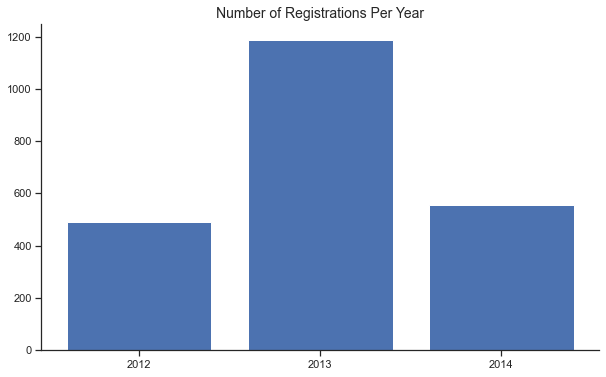

In [370]:
registrations_by_year = df.Registry_Date.dt.year.value_counts()[[2012,2013,2014]]

plt.bar(x=['2012','2013','2014'], height=registrations_by_year);
plt.title('Number of Registrations Per Year', size=14);

In [371]:
df.Registry_Date.min(), df.Registry_Date.max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

__Observation__: 2013 had the highest number of registrations at nearly 1200. This is partially due to the fact that the data begins at the end of July in 2012 and ends at the end of June in 2014, making 2013 the only full year of data.

#### 2. Distribution of income (histogram)<a id="2"></a>

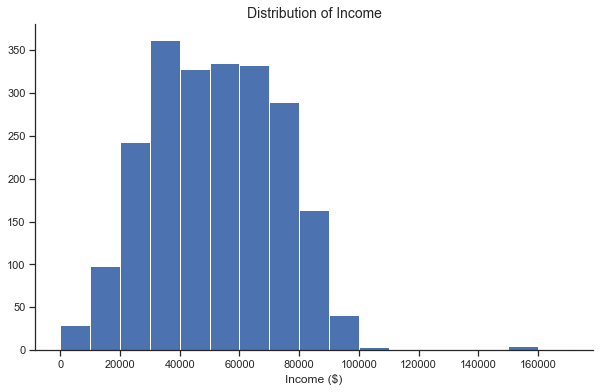

In [372]:
binsize = 10000
high = df.Income.max()
bins = np.arange(0, high + binsize, binsize)

plt.hist(data=df, x='Income', bins=bins)
plt.xlabel('Income ($)')
plt.xticks(np.arange(0, 180000, 20000))
plt.title("Distribution of Income", size=14);

__Observation__: If it were not for a few outliers above \\$100k, this plot would resemble a normal distribution. As it stands now however, it is right-skewed with the bulk of incomes falling between \\$30k and \\$80k. Had I not removed the outlier at \\$666,666 the distribution and mean would have been even further skewed to the right.

#### 3. Distribution of birth year (histogram)<a id="3"></a>

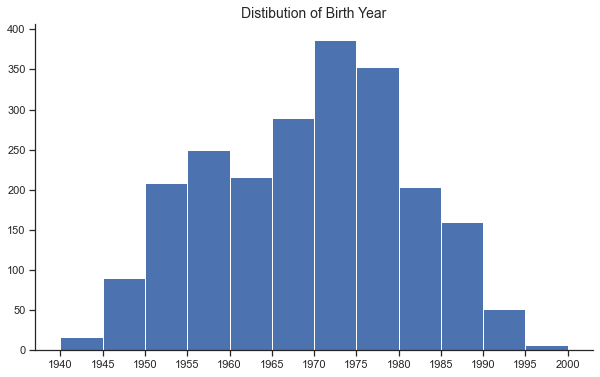

In [373]:
binsize = 5
low = df.Birth_Year.min()
high = df.Birth_Year.max()
bins = np.arange(low, high + binsize, binsize)

plt.hist(data=df, x='Birth_Year', bins=bins)
plt.title("Distibution of Birth Year", size=14)
plt.xticks(np.arange(1940, 2005, binsize));

__Observation__: The largest group seems to be born between 1965 and and 1980. But that made me wonder, "so how old are these people?". So I took the assumed year of data collection of 2015 and calculated the consumer ages in the plot below.

#### 4. Distribution of ages (boxplot)<a id="4"></a>

In [374]:
age_column = 2015 - df["Birth_Year"]
df.insert(3, "Age", age_column)
df.head()

,ID,Registry_Date,Birth_Year,Age,Education,Marital_Status,Country,Income,Last_Purchase,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complaint
0,1826,2014-06-16,1970,45,Bachelor,Divorced,Spain,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0
1,1,2014-06-15,1961,54,Bachelor,Single,Canada,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,1,0,0,0,1,0
2,10476,2014-05-13,1958,57,Bachelor,Married,United States,67267.0,0,0,1,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0
3,1386,2014-05-11,1967,48,Bachelor,In a relationship,Australia,32474.0,0,1,1,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0
4,5371,2014-04-08,1989,26,Bachelor,Single,Spain,21474.0,0,1,0,6,16,24,11,0,34,2,3,1,2,7,0,0,1,0,0,1,0


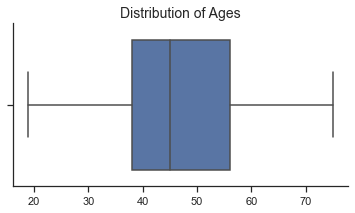

In [375]:
plt.figure(figsize=(6,3))

sns.boxplot(data=df, x='Age');
plt.xlabel("")
plt.title("Distribution of Ages", size=14);

__Observation__: Here we see that the median age of customers is around 45, and the largest portion being between 38 and 56 years old.

#### 5. Number of IDs by education, marital status, and country (categorical barplot)<a id="5"></a>

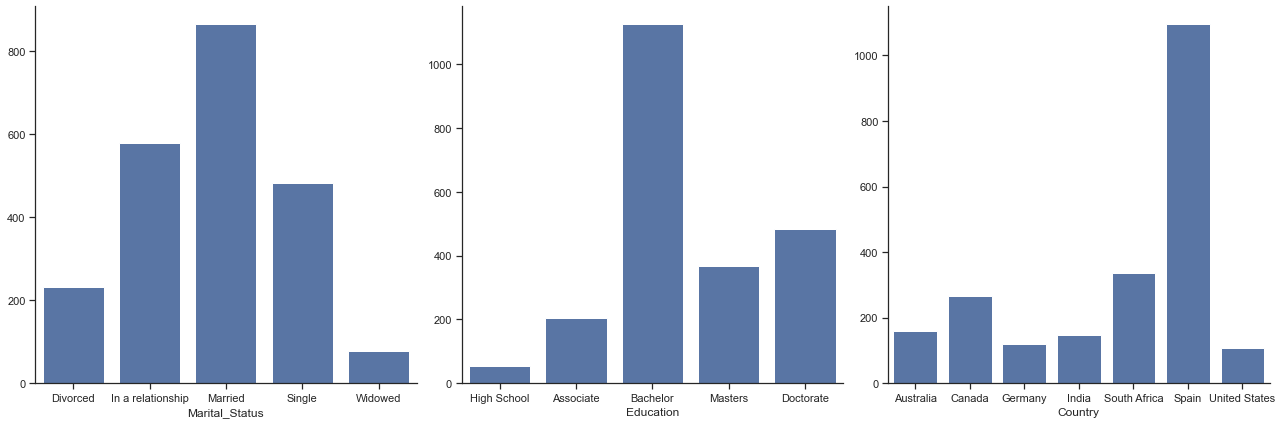

In [376]:
fig, ax = plt.subplots(ncols=3, figsize=[18,6])

variables = ['Marital_Status', 'Education', 'Country']
for i in range(len(variables)):
    var = variables[i]
    sns.countplot(data=df, x=var, color=default_color, ax=ax[i])
    ax[i].set_ylabel('')

plt.tight_layout()

__Observation__: The most common martial statuses in the sample was "married" or "in a relationship". Overwhelmingly the most common education level was a 4-years bachelor's degree, suggesting the sample is middle class. The distribution of income also supports this. The vast majority of customer IDs were based out of Spain, suggesting this is perhaps a Spain-based company. 

#### 6. Distribution of spending by product type (histograms)<a id="6"></a>

In [377]:
# Isolate the "product type" columns
mnts = [col for col in df.columns if 'Mnt' in col]
mnts

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

[Reference: Find column whose name contains a specific string](https://stackoverflow.com/questions/21285380/find-column-whose-name-contains-a-specific-string)

In [378]:
df[mnts].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,303.507389,26.302732,166.782803,37.354232,27.063144,43.841021
std,336.906442,39.778404,225.845859,54.384470,41.316920,51.974571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


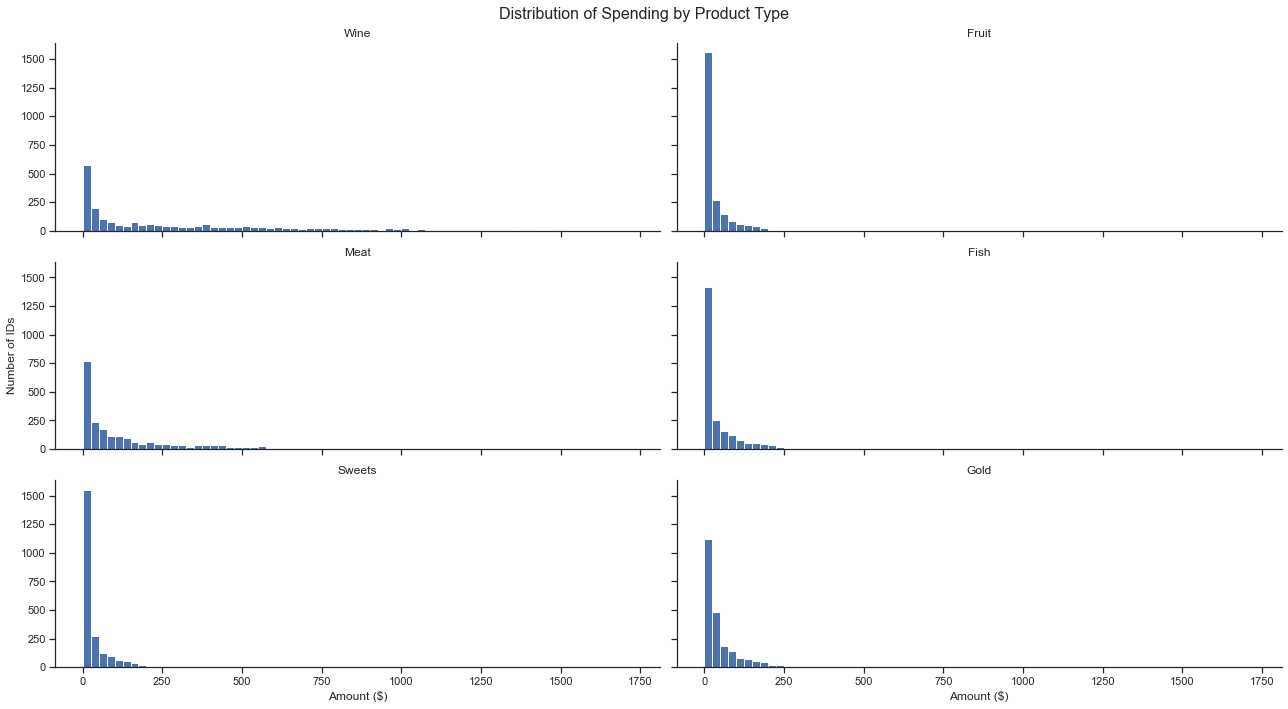

In [379]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = [18,10], sharex = True, sharey = True)
bins= range(0, 1750, 25)

ax[0,0].hist(data= df, x= 'MntWines', bins=bins)
ax[0,1].hist(data= df, x= 'MntFruits', bins=bins)
ax[1,0].hist(data= df, x= 'MntMeatProducts', bins=bins)
ax[1,1].hist(data= df, x= 'MntFishProducts', bins=bins)
ax[2,0].hist(data= df, x= 'MntSweetProducts', bins=bins)
ax[2,1].hist(data= df, x= 'MntGoldProds', bins=bins)

ax[0,0].set(title='Wine')
ax[0,1].set(title='Fruit')
ax[1,0].set(title='Meat', ylabel= "Number of IDs")
ax[1,1].set(title='Fish')
ax[2,0].set(title='Sweets', xlabel="Amount ($)")
ax[2,1].set(title='Gold', xlabel="Amount ($)")

plt.suptitle('Distribution of Spending by Product Type', size=16)
plt.tight_layout();

__Observation__: Due to the visualization best practices of sharing the same X-axis and Y-axis to reduce effort and likelihood of a visual misunderstanding, I've wound up with fairly unhelpful set of plots. This is mainly due to the fact that the `MntMeatProducts` column has a max of \\$1725 whereas most other columns, apart from the `MntWines` column have max values under \\$400. 
To remedy this I could either 
- remove the outliers from the data,
- transform the x-axis to its log value, or 
- use the `xlim()` function to lower the range of the plots.

Since I'm simply in the data exploration phase, perfection isn't necessary so I'll opt to simply reduce the upper x-axis limit using `xlim()`.

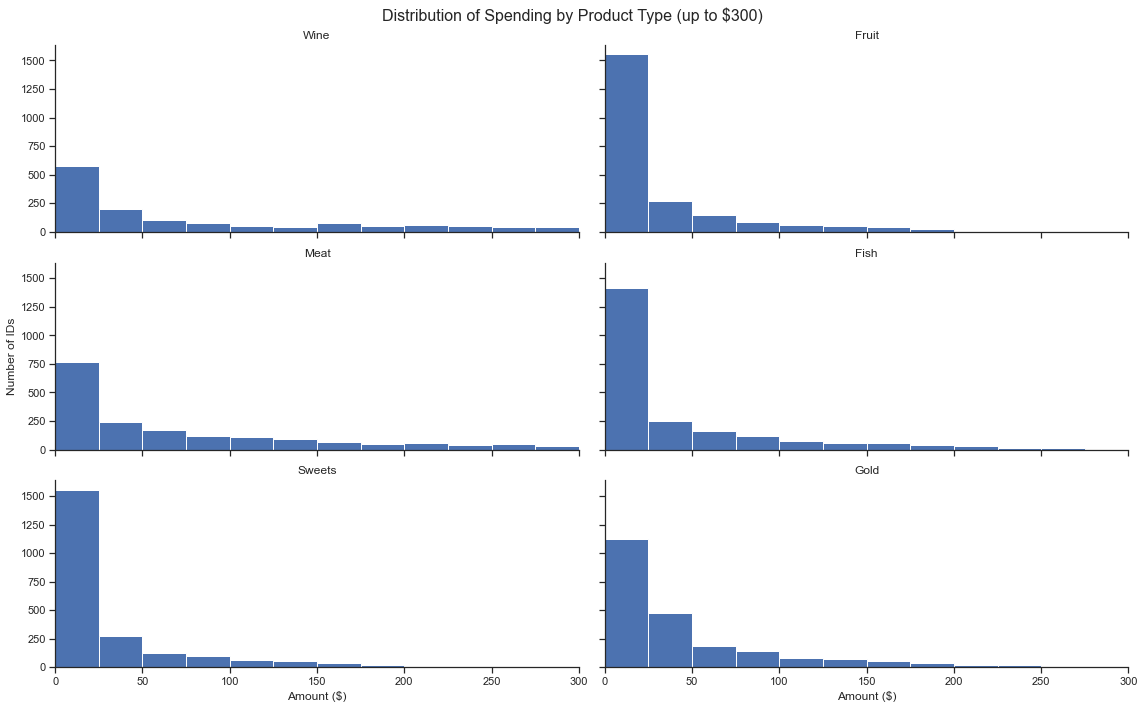

In [380]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = [16,10], sharex = True, sharey = True)
bins= range(0, 1750, 25)

ax[0,0].hist(data= df, x= 'MntWines', bins=bins)
ax[0,1].hist(data= df, x= 'MntFruits', bins=bins)
ax[1,0].hist(data= df, x= 'MntMeatProducts', bins=bins)
ax[1,1].hist(data= df, x= 'MntFishProducts', bins=bins)
ax[2,0].hist(data= df, x= 'MntSweetProducts', bins=bins)
ax[2,1].hist(data= df, x= 'MntGoldProds', bins=bins)

ax[0,0].set(title='Wine')
ax[0,1].set(title='Fruit')
ax[1,0].set(title='Meat', ylabel= "Number of IDs")
ax[1,1].set(title='Fish')
ax[2,0].set(title='Sweets', xlabel="Amount ($)")
ax[2,1].set(title='Gold', xlabel="Amount ($)")

plt.xlim(0, 300) # Added to lower the upper x-axis limit
plt.suptitle('Distribution of Spending by Product Type (up to $300)', size=16)
plt.tight_layout();

__Observation__: The columns with tall bars below \\$25 indicate that most customers didn't spend that much on fruit, fish, and sweets. This could be because these products are naturally low costing or that purchases were infrequent. Gold, wine, and meat however, had shorter bars below \\$25 and were more spread out to high price ranges. These products are typically more expensive and appealing to the majorily middle-class customers who can afford these relative luxuries. 

#### 7. Distribution of total spending (histogram)<a id="7"></a>

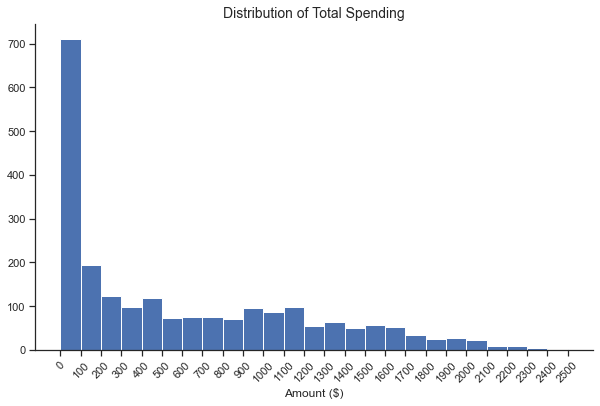

In [381]:
# Aggregrate the totals of all products show create a column for total spending per ID
df['TotalMnt'] = df[mnts].sum(axis=1)

# Create plot
bins = np.arange(0, df['TotalMnt'].max(), 100)
plt.hist(df['TotalMnt'], bins=bins)

# Customize plot
plt.title("Distribution of Total Spending", size=14)
plt.xlabel("Amount ($)")
plt.xticks(bins, rotation=45);

In [382]:
df['TotalMnt'].max()

2525

__Observation__: 700 out of roughly 2400 IDs, more that 25% of all IDs, spent under \\$100 during the roughly 3 years of sampling. This is a problem that should be addressed by the sales and marketing teams. From there, the number drops sharply at just 200 IDs spending between \\$100 and \\$200 dollars. The numbers continue to decline but vary widely as far as the max value of \\$2525. 

#### 8. Share of spending by product type (horizontal barplot)<a id="8"></a>

In [383]:
# Create definition to add bar values
def hbarValue(ax):
    '''
    barPerc(): Add value to bar plots
    args:
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. Access the bars (aka patches)
    bars = ax.patches
    ## 2a. For each bar
    for bar in bars:
        # 3. Add text (.get_height() is the count/value)
        ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height()-0.53,
            f'{bar.get_width():.1f}%',
            ha="center",
            va="bottom",
            size="14",
            color="white")

In [384]:
# Create definition to create a custom horizontal bar plot
def hbar_share(var, title):
    # Get totals for each var
    total_by_var = np.sum(df[var].iloc[:,:], axis=0)
    # Add totals together for the total of variables
    total_vars = total_by_var.sum()
    # Derive percentage of total var for each var
    percent_by_var = (total_by_var/total_vars*100).sort_values(ascending=False)
    # Create optional labels for legend
    # Create horizontal boxplot object
    ax = percent_by_var.to_frame().T.plot.barh(stacked=True, figsize=(15, 6))
    # Customize the plot
    labels = percent_by_var.index
    plt.yticks([])
    plt.xlim((0,100))
    plt.legend(labels, bbox_to_anchor=(1,1))
    plt.title(title, size=16)
    # Add bar values
    hbarValue(ax)

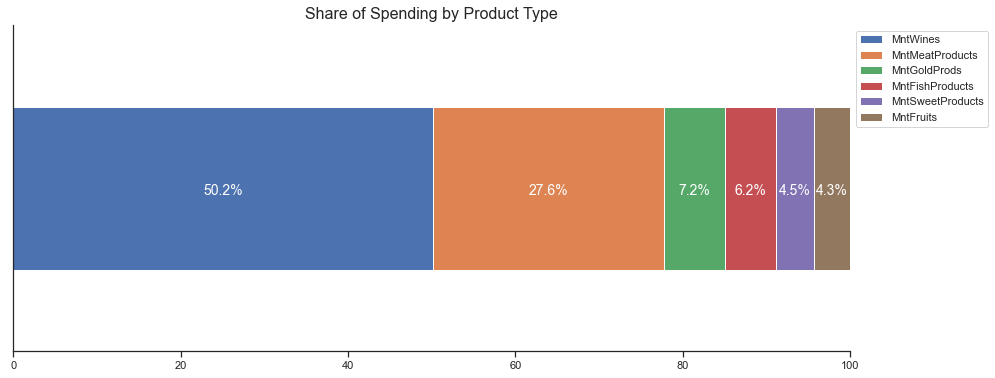

In [385]:
# Assign keyword arguments
var = mnts
title = 'Share of Spending by Product Type'

# Create plot
hbar_share(var, title)

[Reference: Create a single horizontal stacked bar chart from Pandas data](https://www.py4u.net/discuss/257296)

__Observation__: Over half of total sales are attributed ot wine sales! Distibution was even more biased than I thought. 

#### 9. Number of kids, teens, and total dependents per household (barplots)<a id="9"></a>

Let's look at the number of kids and teens in each household. And I can tell that I'm going to want to see the __total__ dependents in one household so I will transform the `Kidhome` and `Teenhome` columns to form a new column.

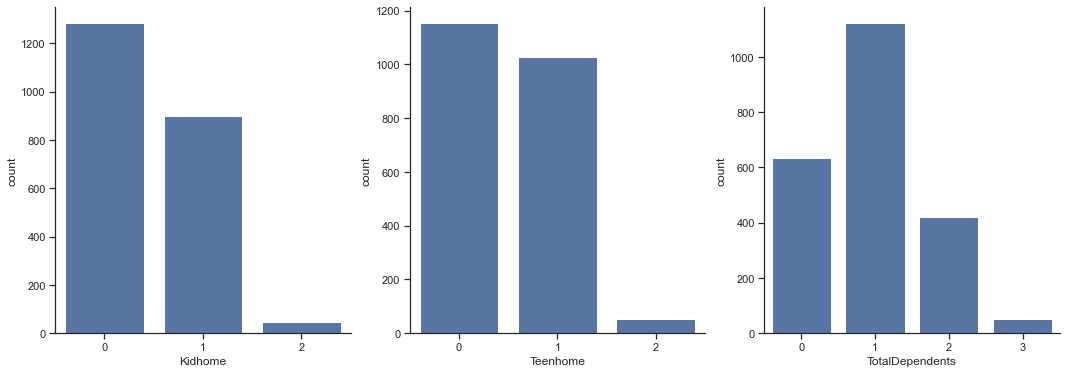

In [386]:
df['TotalDependents'] = df[["Kidhome","Teenhome"]].sum(axis=1)

plt.figure(figsize=[18,6])
base_color = sns.color_palette()[0]

variables = ['Kidhome', 'Teenhome', 'TotalDependents']
for i in range(len(variables)):
    var = variables[i]
    plt.subplot(1,3,1+i)
    sns.countplot(data=df, x=var, color=base_color)

__Observation__: By combining the two columns, we can see that it's most common for households to have 1 dependent. Another benefit of doing this transformation was seeing that there are households with 3 dependents, a fact which was not observable otherwise. 

#### 10. Number of purchases by sales channel (histograms)<a id="10"></a>

In [387]:
purchases = [col for col in df.columns if 'Purchases' in col]
purchases

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [388]:
df[purchases].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2233.000000,2233.000000,2233.000000,2233.000000
mean,2.322884,4.080161,2.656068,5.788625
std,1.932810,2.778135,2.921299,3.255285
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000


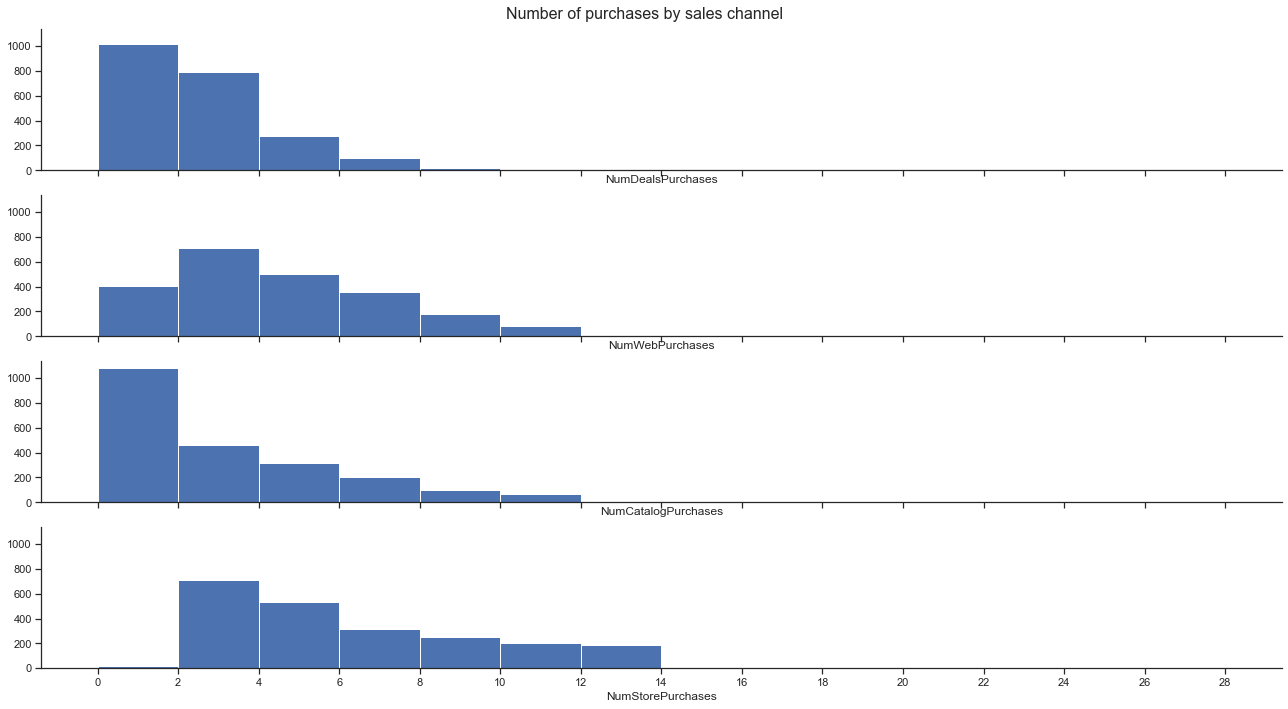

In [389]:
fig, ax = plt.subplots(nrows=4, figsize = [18,10], sharex = True, sharey = True)

variables = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df[var]), max(df[var])+2, 2)
    ax[i].hist(data=df, x=var, bins=bins)
    ax[i].set_xlabel(var)
    
plt.suptitle('Number of purchases by sales channel', size=16)
plt.xticks(np.arange(0, 28+2, 2))
plt.tight_layout()

__Observation__: What's difficult to see however is which sales channel produced the most purchases. My assumption is that it's the channel which was most heavily right-skewed and has a low amount in the 0-2 bin. I'll make a stacked horizontal bar chart to visualize the share of purchases.

#### 11. Share of purchases by sales channel (horizontal barplot)<a id="11"></a>

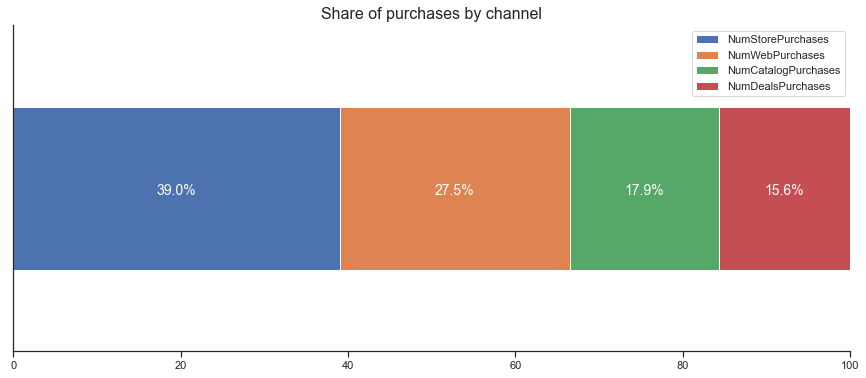

In [390]:
# Assign keyword arguments
var = purchases
title = 'Share of purchases by channel'

# Create plot
hbar_share(var, title)

__Observation__: Instore was most popular method of purchase between 2012 and 2015 for customers of this company. It would be interesting to look at this data between 2019 and 2021 to see how the pandemic has affected purchasing methods.

#### 12. Total number of purchases (histogram)<a id="12"></a>

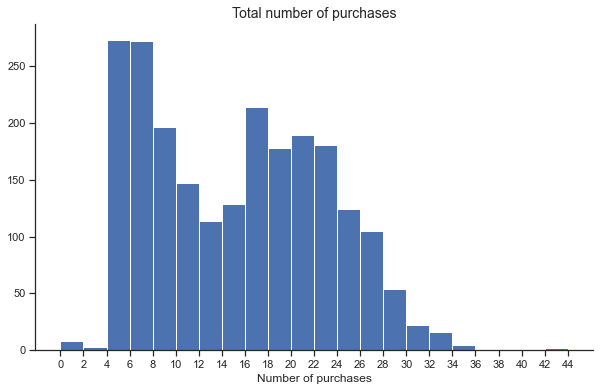

In [391]:
df['TotalPurchases'] = df[purchases].sum(axis=1)

bins = np.arange(0, df['TotalPurchases'].max()+2, 2)

plt.hist(df['TotalPurchases'], bins=bins)
plt.title("Total number of purchases", size=14)
plt.xlabel("Number of purchases")
plt.xticks(bins);

__Observation__: This distribution is bimodal. Most customers made between 4 and 10 or 16 and 24 purchases during the sample period.

#### 13. Number and share of campaign success (horizontal bar plot and pie chart)<a id="13"></a>

In [392]:
campaigns = [col for col in df.columns if 'Cmp' in col]+["Response"]
campaigns

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Response']

In [393]:
df[campaigns].sum()

AcceptedCmp1    143
AcceptedCmp2     30
AcceptedCmp3    162
AcceptedCmp4    167
AcceptedCmp5    162
Response        330
dtype: int64

In [394]:
# Change to dataframe that is easy to plot
campaigns_df = pd.DataFrame(df[campaigns].sum(), columns=['Sum']).sort_values(by='Sum').reset_index()

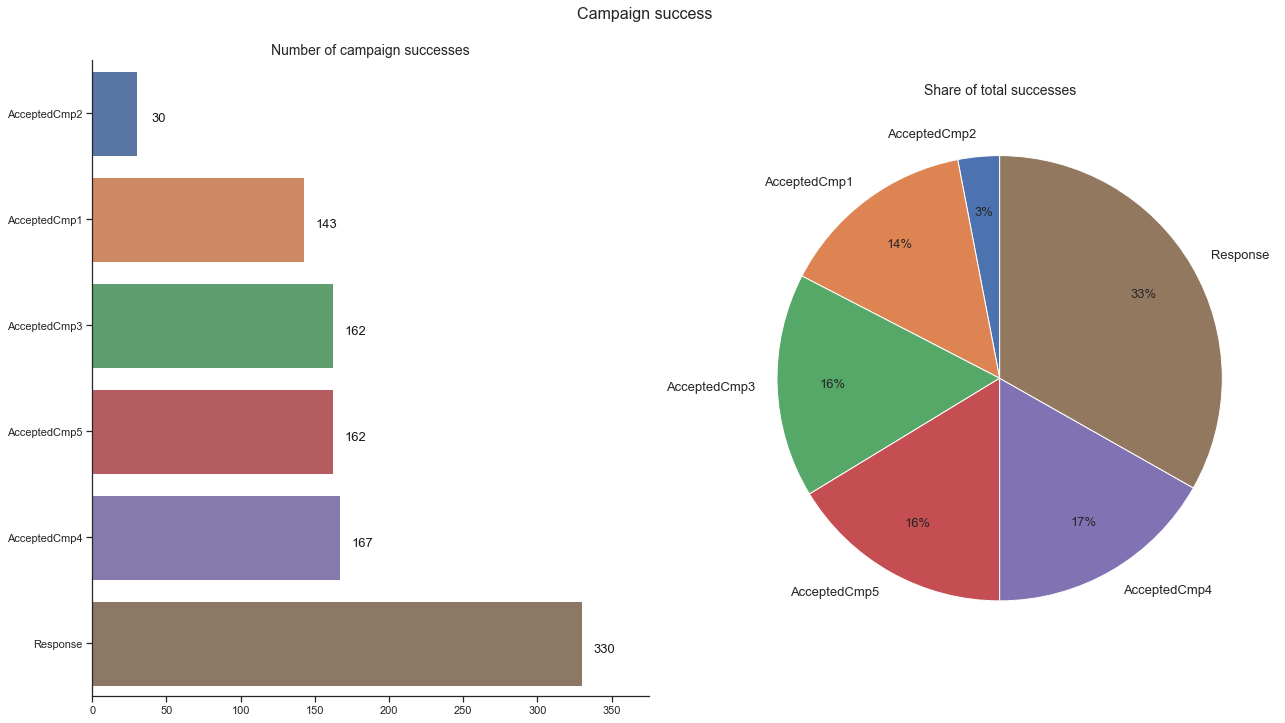

In [395]:
# Visualize results
fig, ax = plt.subplots(ncols=2, figsize=[18,10])

# Create left-hand horizontal bar plot
ax[0] = sns.barplot(x='Sum', y='index', data=campaigns_df, ax=ax[0])
ax[0].set_title(label='Number of campaign successes', fontdict={'fontsize': 14})
ax[0].set(xlim=(0,375), xlabel='', ylabel='')

# Add bar values
for p,q in zip(ax[0].patches, campaigns_df['Sum']):
    ax[0].text(x=q+15,
               y=p.get_y()+0.51,
               s=q,
               ha="center",
               va="bottom",
               size="13",
               color="black", 
               alpha=0.9);
    
# Create right-hand pie chart    
ax[1] = plt.pie(x=campaigns_df['Sum'], 
                labels=campaigns_df["index"], 
                startangle=90, 
                autopct='%.0f%%', 
                pctdistance=0.75,
                textprops={'fontsize':13})
plt.title("Share of total successes", fontsize=14)

fig.suptitle("Campaign success", fontsize=16, y=1)
plt.tight_layout()

__Observation__: With 330 success, the most recent campaign, the "response", was responsible for 33% of all campaign successes. Excluding campaign two, all other capaigns resulted in similiar success ranging from 143 to 167 success and a share of 14% to 17% of total successes. Campaign two was a complete failure with only 30 successes resulting in 3% of the total share. It would be worth investigating as two why the "response" campaign was so successful and why campaign two was not and then shape future campaigns from this feedback.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I did several transformations. All which I documented above.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I did extensive tidying, adjusting, and form-changing in the data wrangling step. Some further adjustments were performed during the data exploration phases. All which I documented above. I performed these manipulations because they were necessary in order to properly visualize and anaylze the data.

<a id="bivariate"></a>
### 6.2 Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

14. [Income distribution by country, education level, and marital status (facet grids)](#14)
15. [Mean income by country, education level, and marital status (categorical bar charts)](#15)
16. [Total number purchases by country, education level, and marital status (categorical bar charts)](#16)
17. [Mean number of purchases by country, education level, marital status (categorical bar charts)](#17)
18. [Distribution of amount spent and number of purchases vs categorical variables (violin plots)](#18)
19. [Distribution of amount spent by product type against number of dependents (boxplots)](#19)
20. [Correlation between numerical variables (heat map)](#20)
21. [Correlation between numerical variables (regression plots)](#21)
22. [Relationship between country and education level (heat map)](#22)
23. [Relationship between country and marital status (countplot)](#23)

#### 14. Income distribution by country, education level, and marital status (facet grids)<a id="14"></a>

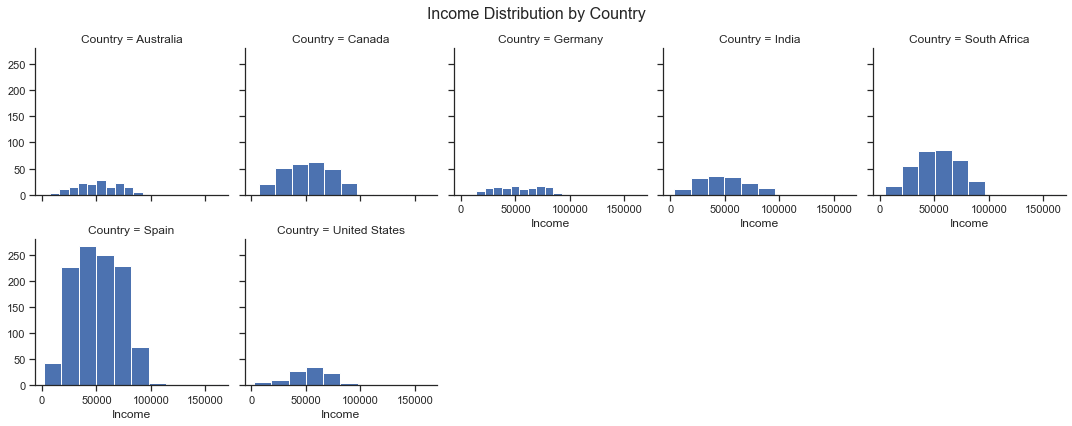

In [396]:
g=sns.FacetGrid(data=df, col="Country", col_wrap=5)
g.map(plt.hist, 'Income')

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Income Distribution by Country', fontsize=16,);
plt.tight_layout();

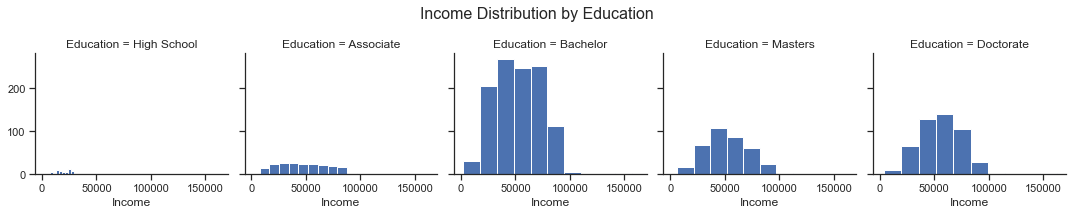

In [397]:
g=sns.FacetGrid(data=df, col="Education")
g.map(plt.hist, 'Income')

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Income Distribution by Education', fontsize=16);
plt.tight_layout();

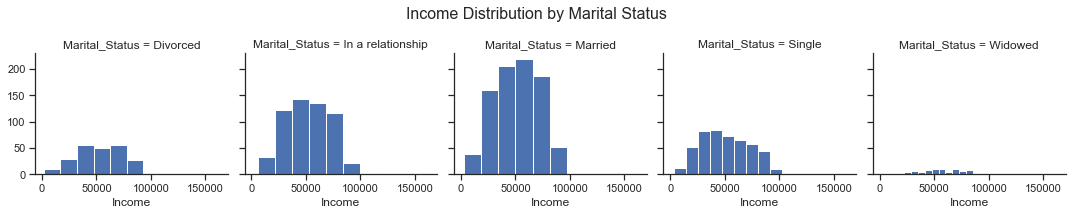

In [398]:
g=sns.FacetGrid(data=df, col="Marital_Status")
g.map(plt.hist, 'Income')
g.fig.subplots_adjust(top=0.9)

g.fig.suptitle('Income Distribution by Marital Status', fontsize=16);
plt.tight_layout();

__Observation__: In a previous section (5. Number of IDs by education, marital status, and country (categorical barplot)), I saw that Spain, bachelor, and married were the most frequent variables within their respective categories. This pattern continues when compared against income.

#### 15. Mean income by country, education level, and marital status (categorical bar plots)<a id="15"></a>

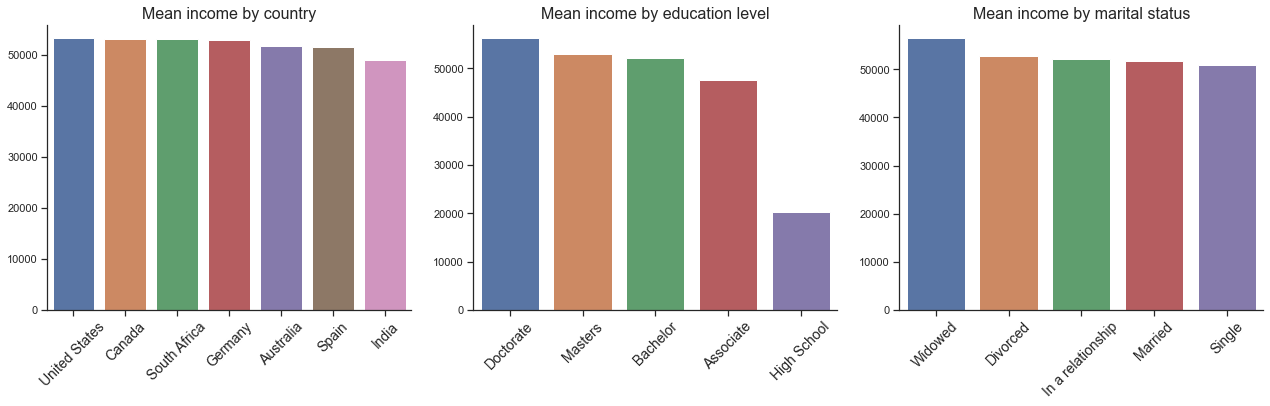

In [399]:
plt.figure(figsize=[18,6])

variables = ['Country', 'Education', 'Marital_Status']
titles = ['country', 'education level', 'marital status']

for i in range(len(variables)):
    plt.subplot(1,3,1+i)
    grouped = df.groupby(variables[i])['Income'].mean().sort_values(ascending=False)
    sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)
    plt.title('Mean income by {}'.format(titles[i]), size=16)
    plt.xlabel('')
    plt.xticks(rotation=45, fontsize=14)

plt.tight_layout(pad=2)

__Observation__: Most of these observations made sense. USA had the highest income by only slightly and was generally compariable to all developed countries excepted for India. Naturally, those with 4+ year degrees on average made more than someone with an associates degree and much more than someone with no secondary education. Curiously, widowers had then divorsees had the highest mean incomes of the martial status categories.

#### 16. Total number purchases by country, education level, and marital status (categorical bar plots)<a id="16"></a>

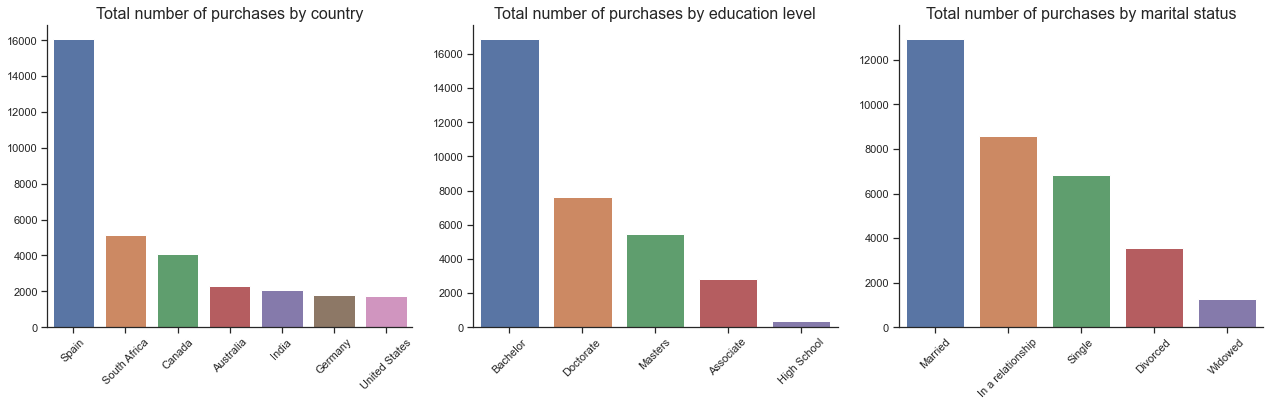

In [400]:
plt.figure(figsize=[18,6])

variables = ['Country', 'Education', 'Marital_Status']
titles = ['country', 'education level', 'marital status']
for i in range(len(variables)):
    plt.subplot(1,3,1+i)
    grouped = df.groupby(variables[i])['TotalPurchases'].sum().sort_values(ascending=False)
    sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)
    plt.title('Total number of purchases by {}'.format(titles[i]), size=16)
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=2)

__Observation__: These obvservations are all logical as they correlate with the amount of user IDs. So it would stand to logic that these variables would have also made the most purchases.

#### 17. Mean number of purchases by country, education level, marital status (categorical bar plots)<a id="17"></a>

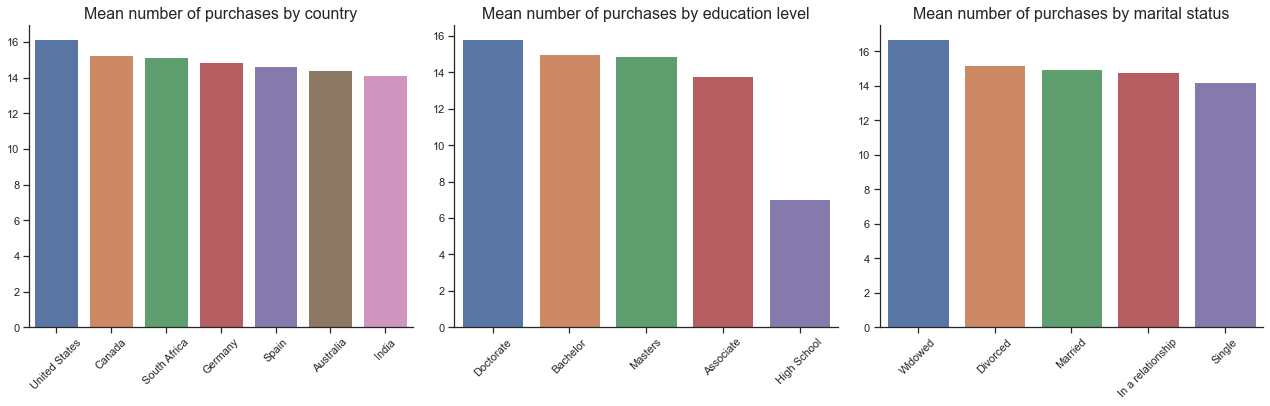

In [401]:
plt.figure(figsize=[18,6])

variables = ['Country', 'Education', 'Marital_Status']
titles = ['country', 'education level', 'marital status']
for i in range(len(variables)):
    plt.subplot(1,3,1+i)
    grouped = df.groupby(variables[i])['TotalPurchases'].mean().sort_values(ascending=False)
    sns.barplot(x=grouped.index, y=grouped.values, order=grouped.index)
    plt.title('Mean number of purchases by {}'.format(titles[i]), size=16)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.tight_layout(pad=2)

__Observation__: There is very little variation between countries in terms of average number of purchases. All between 14 and 16. In terms of education level, as expected, those with higher level of education also had a higher mean income and made a higher mean number of purchases. Marital status follows a similiar pattern: those with higher mean incomes also make more purchases on average.

#### 18. Distribution of amount spent and number of purchases vs categorical variables (violin plots)<a id="18"></a>

In [402]:
categoric_vars = ['Country', 'Education', 'Marital_Status']

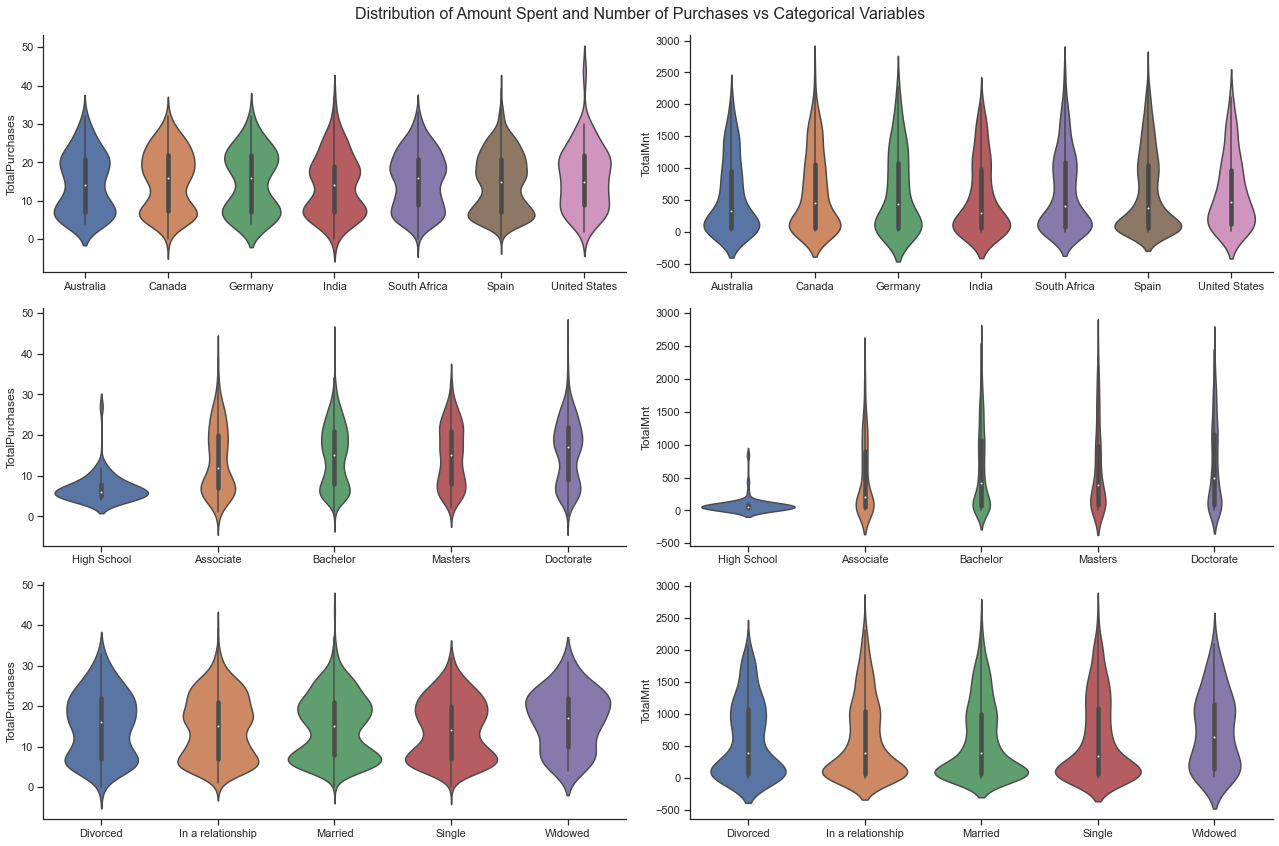

In [403]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=[18, 12])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sns.violinplot(data=df, x=var, y='TotalPurchases', ax=ax[i,0])
    sns.violinplot(data=df, x=var, y='TotalMnt', ax=ax[i,1])
    ax[i,0].set_xlabel('')
    ax[i,1].set_xlabel('')

plt.suptitle(t="Distribution of Amount Spent and Number of Purchases vs Categorical Variables", fontsize=16)
plt.tight_layout(pad=1.5)

__Observation__: For total purchases, we can generally see the same bimodal distribution we saw with the basic histogram (12. Total number of purchases (histogram)). By country, this bimodal characteristic is less prevalent but even more pronounced in India and Spain. By education level, the bimodality prevails except for those with high school education, which is right-skewed and peaks on the low end of purchases. By marital status, we see that, as above, widowers have a higher income, make a more purchases on average, so there are more IDs that make more purchases around 20. 
For total amount of purchases, widowers make a wider distribution of amounts rather than the right-skewed distributions of other statuses. Education level also similiar with high school level IDs having a tight distribution around low levels. 

#### 19. Distribution of amount spent by product type and number of dependents (boxplots)<a id="19"></a>

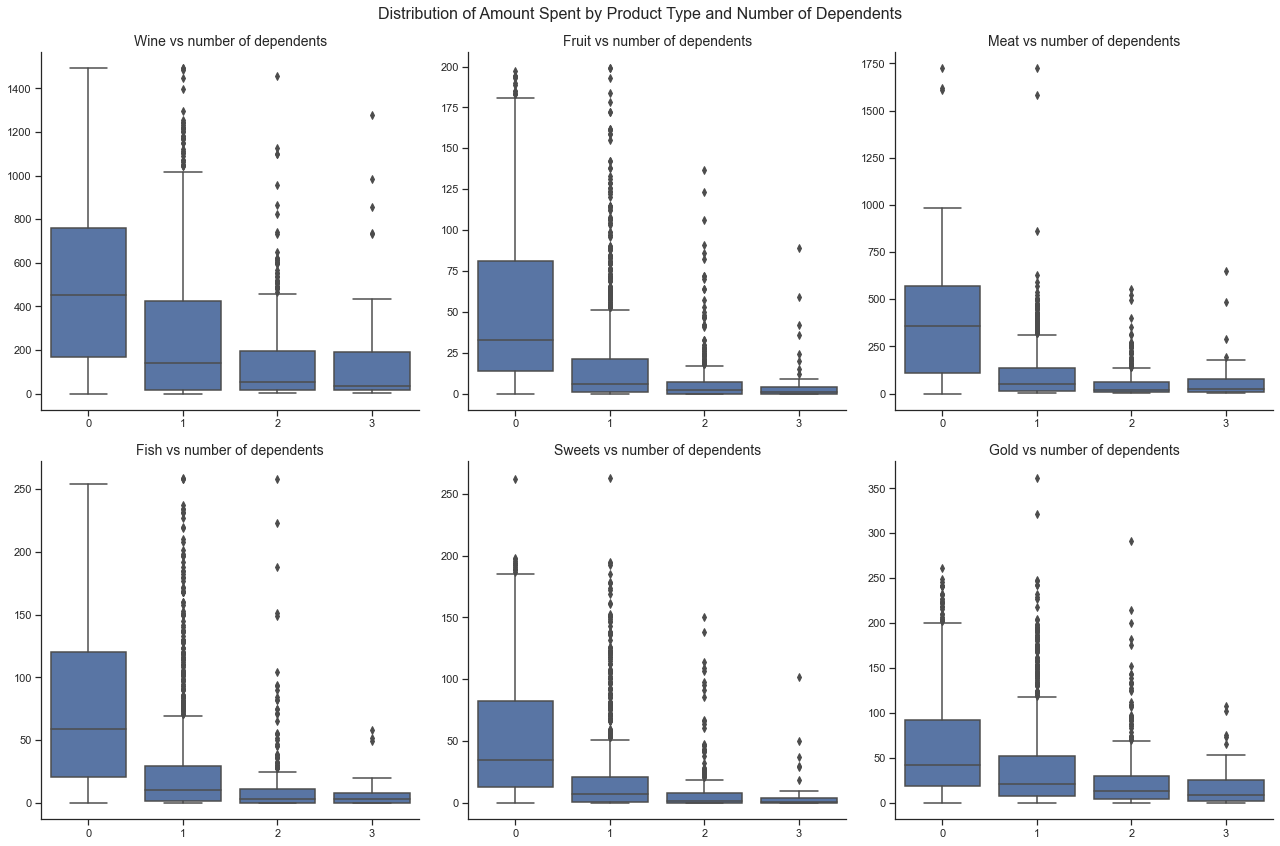

In [404]:
plt.figure(figsize=[18,12])

variables = mnts
title =['Wine', "Fruit", "Meat", "Fish", "Sweets", "Gold"]

for i in range(len(variables)):
    var = variables[i]
    plt.subplot(2, 3, 1+i)
    sns.boxplot(x='TotalDependents', y=var, data=df, color = base_color)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('{} vs number of dependents'.format(title[i]), fontsize=14)
    
plt.suptitle(t="Distribution of Amount Spent by Product Type and Number of Dependents", fontsize=16)
plt.tight_layout(pad=1.5);

**Note:** y-axis is __not__ shared in order to improve readability.

__Observation__: As seen previously, those with 0 dependents spent the most and therefore had the most spread out distribution. In all categories, those with 0 dependents spent more significantly more on each product. Wine is the most popular product with those with 0 dependents spending nearly 500 dollars on average. Even those with 1 dependent spent a median of nearly 200 dollars with IDs tending to spend much more. 

#### 20. Correlation between numerical variables (heat map)<a id="20"></a>

In [405]:
numeric_vars = ['Income','TotalMnt','TotalDependents','TotalPurchases']

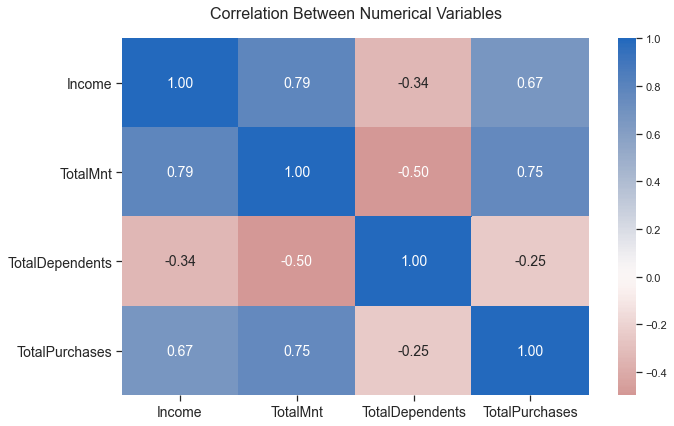

In [406]:
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0, annot_kws={"size": 14});
plt.xticks(fontsize=14);
plt.yticks(fontsize=14)

plt.suptitle(t="Correlation Between Numerical Variables", fontsize=16)
plt.tight_layout();

__Observation__: This was very revealing. A higher number of dependents is negatively correlated with all other charted numerical variables. This is somewhat surprising. I expected out of the countries surveyed that if you had more kids you would have an income large enough to support them. And in turn, would spend more and make more purchases. This is surprising so I wanted to take a closer look with some regression plots.

#### 21. Correlation between numerical variables (regression plots)<a id="21"></a>

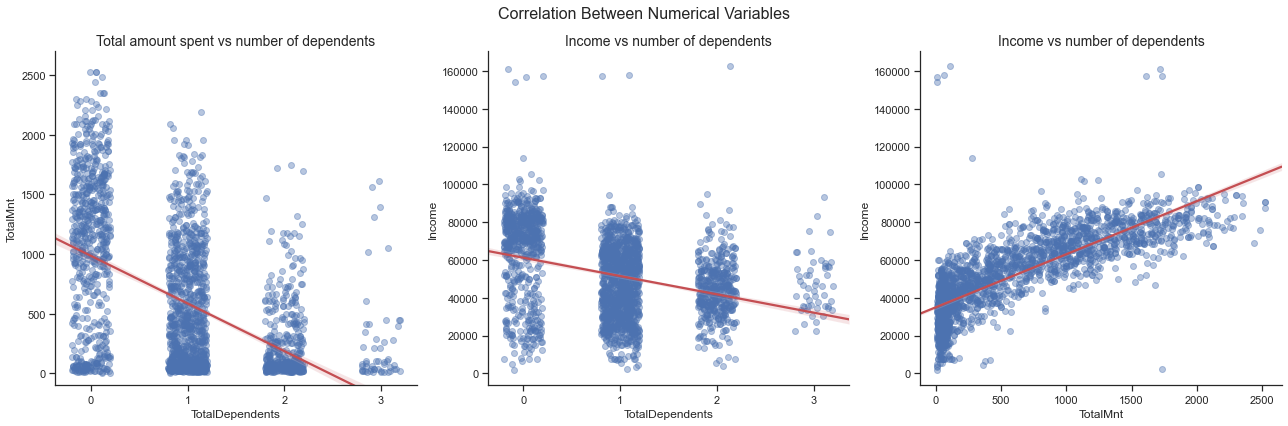

In [407]:
fig, ax = plt.subplots(ncols=3, figsize=[18,6])

sns.regplot(x='TotalDependents', y='TotalMnt', data=df, ax=ax[0], x_jitter=0.2, truncate=False, scatter_kws={'alpha': 0.4}, line_kws={'color': 'r'})
sns.regplot(x='TotalDependents', y='Income', data=df, ax=ax[1], x_jitter=0.2, truncate=False, scatter_kws={'alpha': 0.4}, line_kws={'color': 'r'})
sns.regplot(x='TotalMnt', y='Income', data=df, ax=ax[2], truncate=False, scatter_kws={'alpha': 0.4}, line_kws={'color': 'r'})

ax[0].set_title(label="Total amount spent vs number of dependents", fontsize=14);
ax[1].set_title(label="Income vs number of dependents", fontsize=14);
ax[2].set_title(label="Income vs number of dependents", fontsize=14);

ticks = [0,1,2,3]
ax[0].set(ylim=(-100,2700), xticks=ticks, xticklabels=ticks)
ax[1].set(xticks=ticks, xticklabels=ticks)
          
plt.suptitle(t="Correlation Between Numerical Variables", fontsize=16)
plt.tight_layout();

__Observation__: I can see now too that the negative correlation with total dependents is skewed by the low amount of data points compared to 0 to 2 dependents. Income would be spread out more with with a larger sample. But what remains is the negative (-0.498) correlation with amount spent. One could infer that this was because those with more children had less money to spend on wine, which accounted for the bulk of revenue. 

#### 22. Relationship between country and education level (heat map)<a id="22"></a>

In [408]:
ed_country_grouped = df.groupby(['Education', 'Country']).size()
ed_country_grouped

Education    Country      
High School  Australia          4
             Canada             7
             Germany            2
             India              4
             South Africa       6
             Spain             28
             United States      3
Associate    Australia          9
             Canada            24
             Germany           20
             India             21
             South Africa      25
             Spain             97
             United States      7
Bachelor     Australia         84
             Canada           133
             Germany           59
             India             76
             South Africa     161
             Spain            548
             United States     64
Masters      Australia         32
             Canada            48
             Germany           20
             India             21
             South Africa      60
             Spain            171
             United States     16
Doctorate    Australi

In [409]:
ed_country_grouped = ed_country_grouped.reset_index(name='count')
ed_country_grouped

,Education,Country,count
0,High School,Australia,4
1,High School,Canada,7
2,High School,Germany,2
3,High School,India,4
4,High School,South Africa,6
5,High School,Spain,28
6,High School,United States,3
7,Associate,Australia,9
8,Associate,Canada,24
9,Associate,Germany,20


In [410]:
# Transform df for to use with a heatmap
ed_country_grouped = ed_country_grouped.pivot(index='Education', columns='Country', values='count')
ed_country_grouped

Country,Australia,Canada,Germany,India,South Africa,Spain,United States
Education,,,,,,,
High School,4,7,2,4,6,28,3
Associate,9,24,20,21,25,97,7
Bachelor,84,133,59,76,161,548,64
Masters,32,48,20,21,60,171,16
Doctorate,30,54,19,25,85,251,19


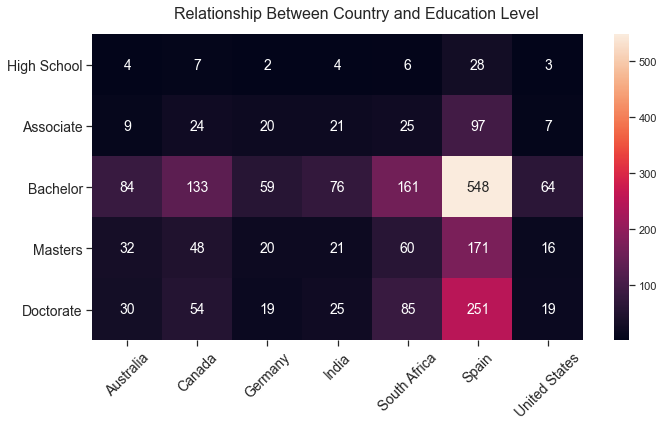

In [411]:
sns.heatmap(ed_country_grouped, annot = True, fmt="d", annot_kws={"size": 14})
plt.xticks(rotation=45, fontsize=14);
plt.yticks(rotation=0, fontsize=14)
plt.ylabel('')
plt.xlabel('')

plt.suptitle(t="Relationship Between Country and Education Level", fontsize=16)
plt.tight_layout();

__Observation__: We knew Spain had the highest share of IDs and we also knew that bachelor's degrees were the most frequent education level. This is most apparent here with a huge number of IDs with bachelor's degrees coming from Spain. Spain also had a very high level of doctorate-level IDs.

#### 23. Relationship between country and marital status (countplot)<a id="23"></a>

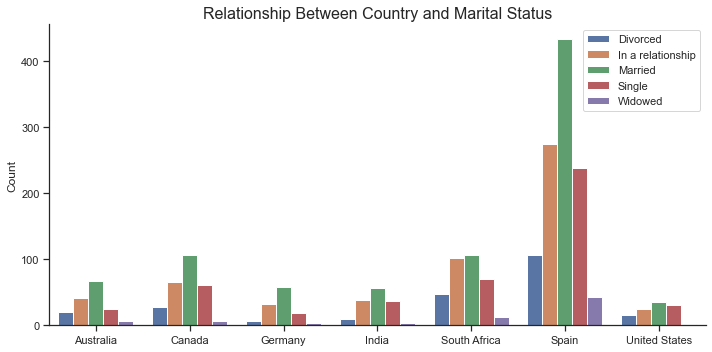

In [412]:
sns.catplot(data=df,
            x="Country", 
            hue="Marital_Status", 
            kind="count", 
            aspect=2,
            legend=False);

plt.xlabel("")
plt.ylabel("Count")
plt.title("Relationship Between Country and Marital Status", fontsize=16)
plt.legend()
plt.tight_layout();

__Observation__: Most of those registered from Spain are likely married and also have a bachelor's degree, as observed in the previous plot. Spain also has more divorsed users than any other category from any other country.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Explained above.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Explained above.

<a id="multivariate"></a>
### 6.3 Multivariate Exploration

24. [Relationship between number of purchases, education, and number of dependents (clustered boxplots)](#24)
25. [Relationship between total amount purchased, country, and marital status (clustered boxplots)](#25)
26. [Relationship between amount spent on wine, country, education (categorical boxplots)](#26)
27. [Relationship between mean amount spent on gold, marital status, and the number of dependents (categorical barplot)](#27)
28. [Relationship between the total amount spent on gold, country, and the number of dependents (categorical split plot)](#28)
29. [Relationship between the total amount spent on gold, education, and the number of dependents (categorical point plot)](#29)
30. [Relationship between income, total amount spent, and the number of dependents (categorical scatter plot)](#30)
31. [Relationship between education, marital status, total amount spent, and the number of purchases (facet grid)](#31)
32. [Summary statistics](#32)

#### 24. Relationship between number of purchases, education, and number of dependents (clustered boxplots)<a id="24"></a>

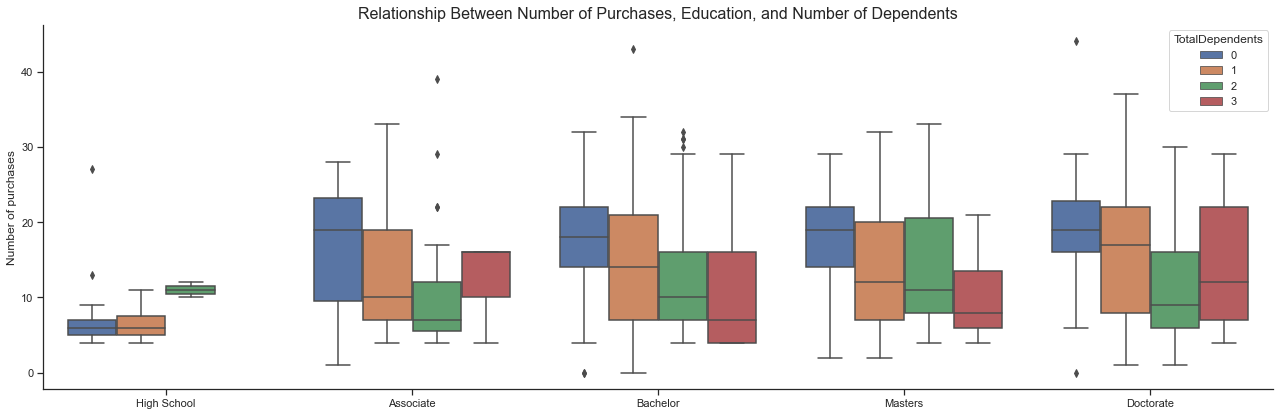

In [413]:
plt.figure(figsize = [18,6])

sns.boxplot(data = df, x ="Education", y="TotalPurchases", hue="TotalDependents")

plt.ylabel("Number of purchases")
plt.xlabel('')

plt.title("Relationship Between Number of Purchases, Education, and Number of Dependents", size=16)
plt.tight_layout(pad=1.5);

__Observation__:

#### 25. Relationship between total amount purchased, country, and marital status (clustered boxplots)<a id="25"></a>

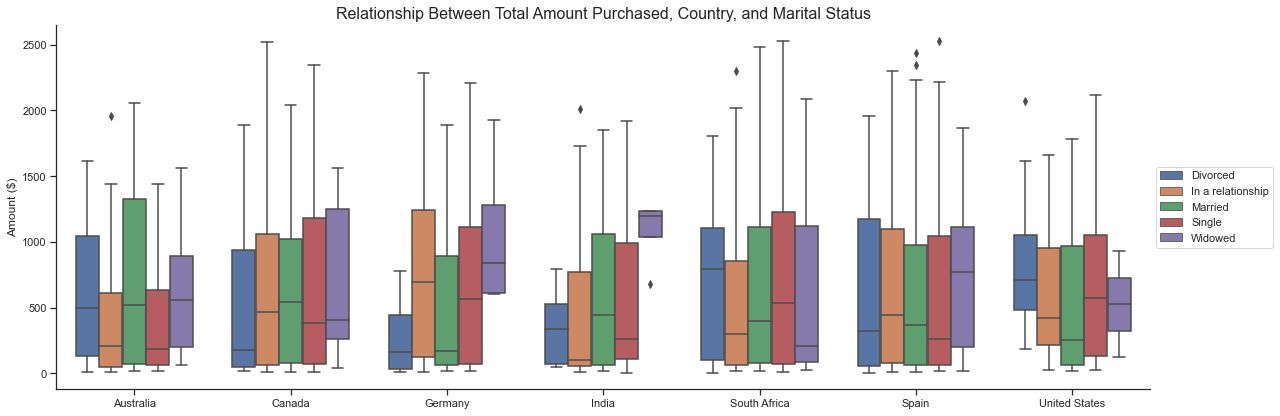

In [414]:
plt.figure(figsize = [18,6])

sns.boxplot(data = df, x ="Country", y="TotalMnt", hue="Marital_Status", width=0.75)

plt.ylabel("Amount ($)")
plt.xlabel('')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))

plt.title("Relationship Between Total Amount Purchased, Country, and Marital Status", size=16)
plt.tight_layout(pad=1.5);

#### 26. Relationship between amount spent on wine, country, education (categorical boxplots)<a id="26"></a>

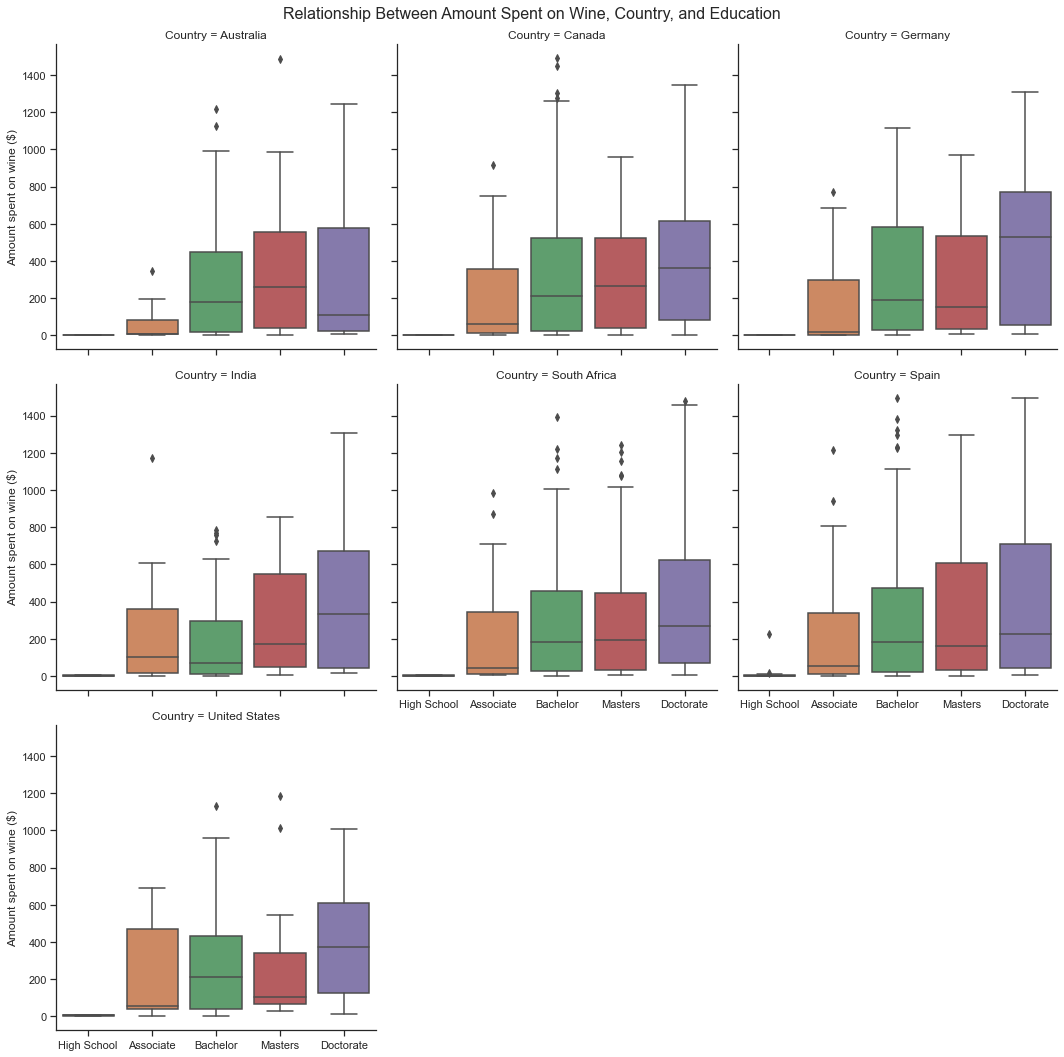

In [415]:
g = sns.catplot(kind='box', 
                data=df, 
                x='Education', 
                col='Country', 
                y='MntWines', 
                col_wrap=3)

g.set_axis_labels("", "Amount spent on wine ($)")

plt.suptitle(t="Relationship Between Amount Spent on Wine, Country, and Education", size=16)
plt.tight_layout(pad=1.5);

__Observation__:

#### 27. Relationship between mean amount spent on gold, marital status, and the number of dependents (categorical barplot)<a id="27"></a>

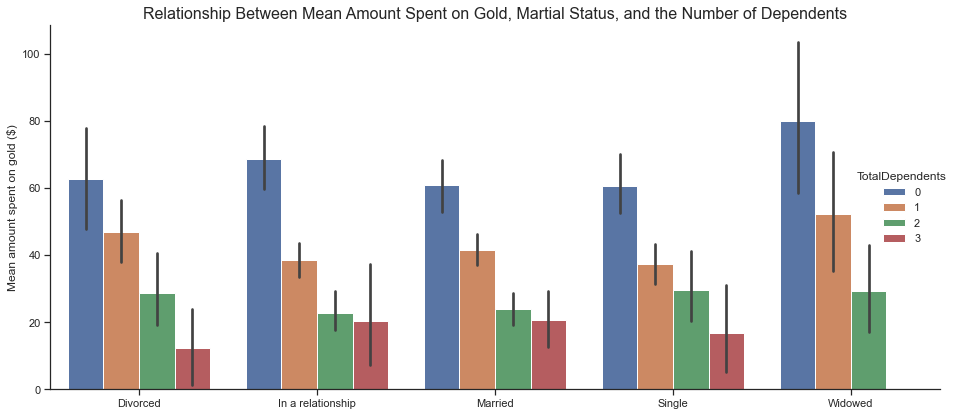

In [416]:
sns.catplot(data=df, 
            y="MntGoldProds", 
            x ="Marital_Status", 
            hue="TotalDependents", 
            kind="bar", 
            aspect=2, 
            height=6);

plt.xlabel("")
plt.ylabel("Mean amount spent on gold ($)")
plt.title("Relationship Between Mean Amount Spent on Gold, Martial Status, and the Number of Dependents", size=16)
plt.tight_layout(pad=1.5);

__Observation__:

#### 28. Relationship between the total amount spent on gold, country, and the number of dependents (categorical split plot)<a id="28"></a>

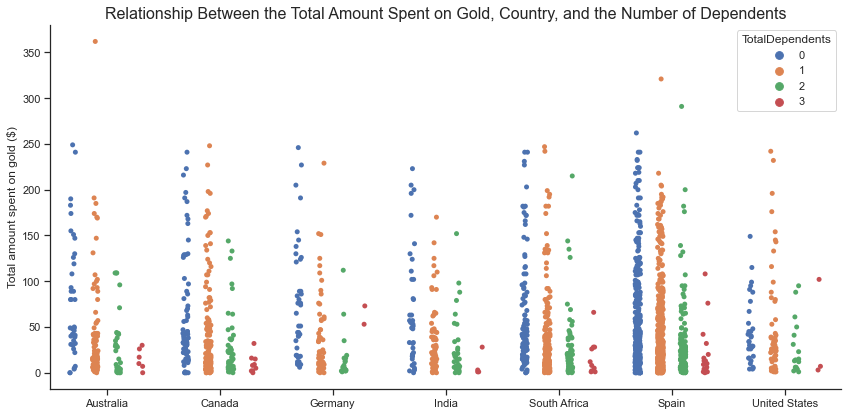

In [417]:
sns.catplot(data=df,
            y="MntGoldProds",
            x ="Country",
            hue="TotalDependents", 
            kind="strip", 
            aspect=2, 
            height=6, 
            dodge=True,
            legend_out=False);

plt.xlabel("")
plt.ylabel("Total amount spent on gold ($)")
plt.title("Relationship Between the Total Amount Spent on Gold, Country, and the Number of Dependents", size=16)
plt.tight_layout(pad=1.5);

__Observation__:

#### 29. Relationship between total amount spent on gold, education, and the number of dependents (categorical point plot)<a id="29"></a>

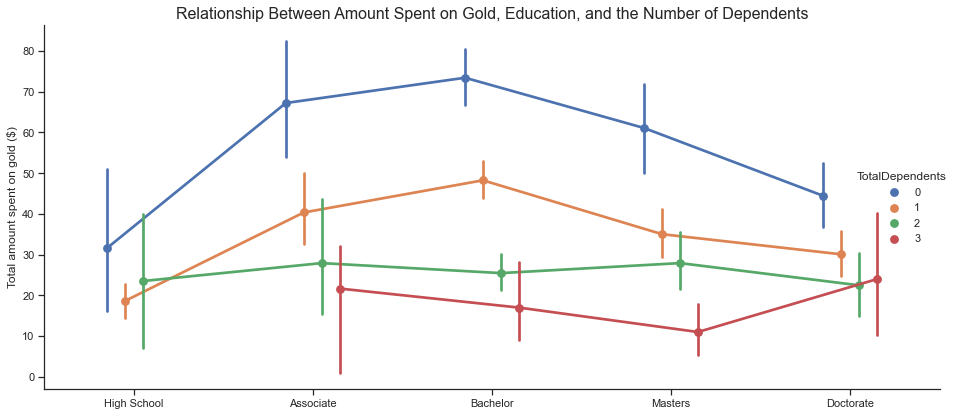

In [418]:
sns.catplot(data=df, 
            y="MntGoldProds", 
            x = "Education", 
            hue= "TotalDependents", 
            kind= "point", 
            aspect=2, 
            height=6, 
            dodge = 0.3);

plt.xlabel("")
plt.ylabel("Total amount spent on gold ($)")
plt.title("Relationship Between Amount Spent on Gold, Education, and the Number of Dependents", size=16)
plt.tight_layout(pad=1.5);

__Observation__: Across the board, regardless of educational background, those with 0 dependents spent more on gold than those who did have dependents. This trend is less pronounced with doctorates and those with high school education likely due to a lack of data. Around the bachelor level, there is lots of data so the trend is very strong.

#### 30. Relationship between income, total amount spent, and the number of dependents (categorical scatter plot)<a id="30"></a>

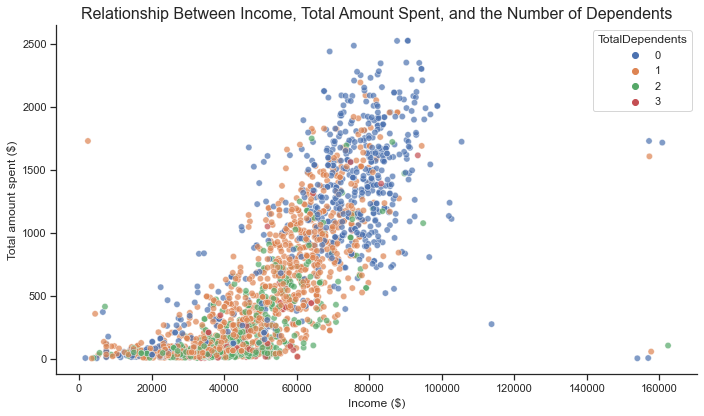

In [419]:
sns.scatterplot(data=df, 
                x="Income", 
                y="TotalMnt", 
                hue= "TotalDependents", 
                palette='deep', 
                s=40, 
                alpha=0.7);

plt.xlabel("Income ($)")
plt.ylabel("Total amount spent ($)")
plt.title("Relationship Between Income, Total Amount Spent, and the Number of Dependents", size=16)
plt.tight_layout(pad=1.5);

__Observation__: This scatterplot simply reaffirms the trend that those with few or no dependents tend to make more money and coincidentally spend more. The up and to the right are the blue dots signifying 0 dependents.

#### 31. Relationship between education, marital status, total amount spent, and the number of purchases (facet grid)<a id="31"></a>

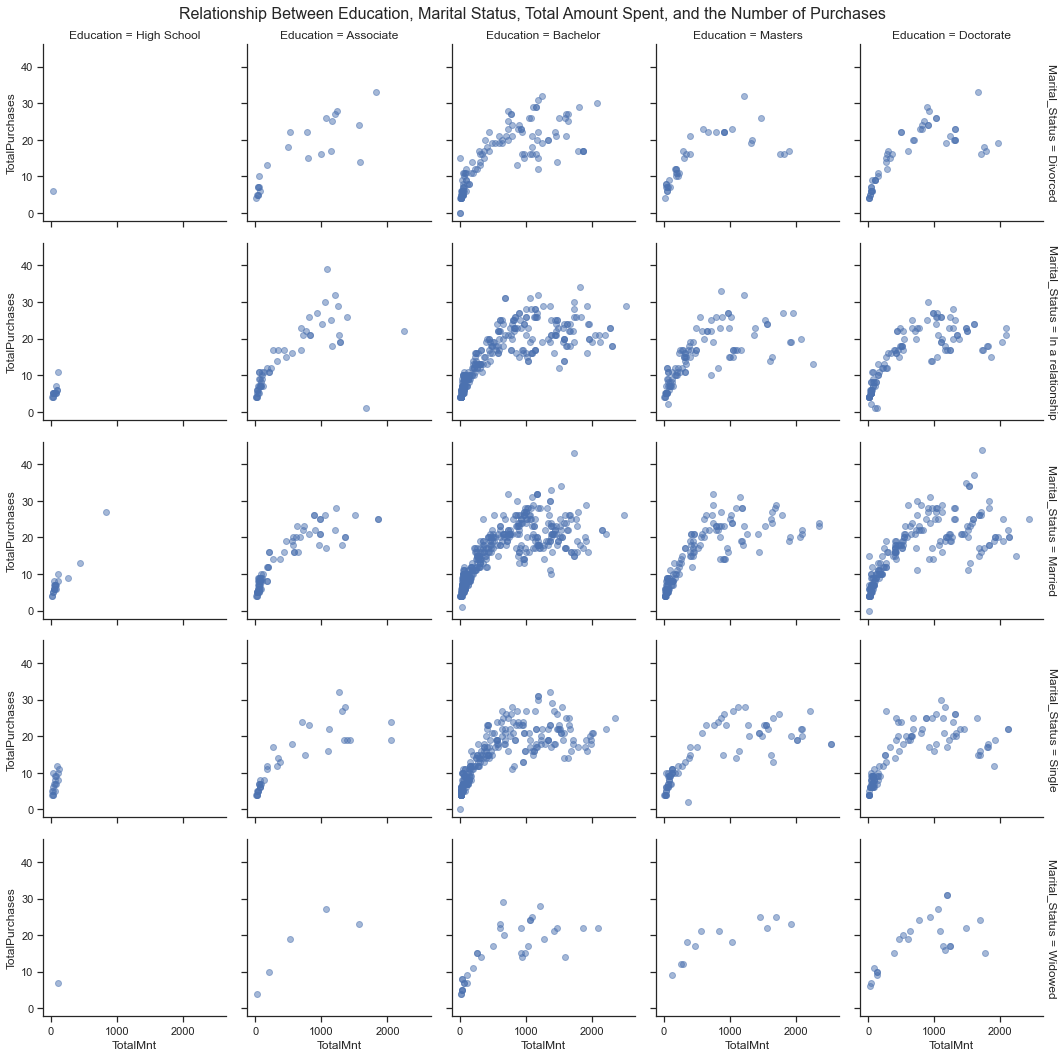

In [420]:
g = sns.FacetGrid(data = df, col ='Education', row ="Marital_Status", margin_titles=True)
g.map(plt.scatter, 'TotalMnt', 'TotalPurchases', alpha=0.5);

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relationship Between Education, Marital Status, Total Amount Spent, and the Number of Purchases", size=16)
plt.tight_layout(pad=1.5)

__Observation__: 

#### 32. Summary statistics<a id="32"></a>

In [421]:
# Average customer demographic
demographics = pd.DataFrame(round(df[['Birth_Year', 'Age', 'Income', 'Kidhome', 'Teenhome', 'TotalDependents']].mean(),1), columns=["Average"])
demographics

,Average
Birth_Year,1968.9
Age,46.1
Income,51945.1
Kidhome,0.4
Teenhome,0.5
TotalDependents,1.0


In [422]:
# Average customer purchasing habits
purchasing_habits = pd.DataFrame(round(df[['Last_Purchase', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds',
       'TotalMnt','NumDealsPurchases', 'NumStorePurchases','NumWebPurchases', 'NumCatalogPurchases','TotalPurchases']].mean(),1), columns=["Average"])
purchasing_habits

,Average
Last_Purchase,49.2
MntWines,303.5
MntFruits,26.3
MntMeatProducts,166.8
MntFishProducts,37.4
MntSweetProducts,27.1
MntGoldProds,43.8
TotalMnt,604.9
NumDealsPurchases,2.3
NumStorePurchases,5.8


Code adapted from [here](https://www.kaggle.com/jennifercrockaett/marketing-analytics-eda-task-final).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## 7. Conclusions<a id="conclusion"></a>
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

